In [1]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('Capstone_Diabetics_EDA .csv')
df.head()

,Unnamed: 0,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age
0,0,8222157.0,Caucasian,Female,6.0,25.0,1.0,1.0,CP,41.0,...,No,No,No,No,No,No,No,No,NO,[0-10)
1,1,55629189.0,Caucasian,Female,1.0,1.0,7.0,3.0,SP,59.0,...,Up,No,No,No,No,No,Ch,Yes,>30,[10-20)
2,2,86047875.0,AfricanAmerican,Female,1.0,1.0,7.0,2.0,MD,11.0,...,No,No,No,No,No,No,No,Yes,NO,[20-30)
3,3,82442376.0,Caucasian,Male,1.0,1.0,7.0,2.0,SP,44.0,...,Up,No,No,No,No,No,Ch,Yes,NO,[30-40)
4,4,42519267.0,Caucasian,Male,1.0,1.0,7.0,1.0,SP,51.0,...,Steady,No,No,No,No,No,Ch,Yes,NO,[40-50)


In [7]:
df.isnull().sum()

Unnamed: 0                  0
patient_nbr                 0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
Unnamed: 0                  101766 non-null int64
patient_nbr                 101766 non-null float64
race                        101766 non-null object
gender                      101766 non-null object
admission_type_id           101766 non-null float64
discharge_disposition_id    101766 non-null float64
admission_source_id         101766 non-null float64
time_in_hospital            101766 non-null float64
payer_code                  101766 non-null object
num_lab_procedures          101766 non-null float64
num_procedures              101766 non-null float64
num_medications             101766 non-null float64
number_outpatient           101766 non-null float64
number_emergency            101766 non-null float64
number_inpatient            101766 non-null float64
diag_1                      101766 non-null float64
diag_2                      101766 non-null float64
diag_3    

In [9]:
cat_cols = df.select_dtypes(['object']).columns
cat_cols = cat_cols[:-1]
cat_cols

Index(['race', 'gender', 'payer_code', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
for col in cat_cols:
    freqs=df[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+''+cat
        df[name]=(df[col]==cat).astype(int)
    del df[col]
    print(col)

race
gender
payer_code
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [11]:
df.isnull().sum()

Unnamed: 0                  0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
age                         0
raceCaucasian               0
raceAfricanAmerican         0
raceHispanic                0
raceOther                   0
genderFemale                0
payer_codeMC                0
payer_codeSP                0
payer_codeBC                0
payer_codeHM                0
payer_codeMD                0
payer_codeCP                0
payer_codeUN                0
payer_codeCM                0
                           ..
nateglinideNo               0
nateglinideSteady           0
chlorpropa

In [12]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Age_code"] = lb_make.fit_transform(df["age"])
df[["age", "Age_code"]].head(11)

,age,Age_code
0,[0-10),0
1,[10-20),1
2,[20-30),2
3,[30-40),3
4,[40-50),4
5,[50-60),5
6,[60-70),6
7,[70-80),7
8,[80-90),8
9,[90-100),9


In [13]:
df.drop('age',axis=1,inplace=True)

In [14]:
X=df.drop('diabetesMedYes',axis=1)
Y=df['diabetesMedYes']

In [15]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from catboost import CatBoostClassifier

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((71236, 78), (30530, 78), (71236,), (30530,))

In [17]:
from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,auc

In [18]:
MLA = [
    #Ensemble Methods
    linear_model.LogisticRegression(),
    ensemble.GradientBoostingClassifier(),
    CatBoostClassifier(),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    #Naive Bayes
    naive_bayes.GaussianNB()
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
results=[]

row_index = 0
for alg in MLA:
    
    cv_results = cross_val_score(alg, X_train, y_train, cv=10)
    results.append(cv_results)
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/Users/madhuriramineedi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/madhuriramineedi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/madhuriramineedi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/madhuriramineedi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/madhuriramineedi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

Learning rate set to 0.054386
0:	learn: 0.5280188	total: 82.1ms	remaining: 1m 21s
1:	learn: 0.4066726	total: 108ms	remaining: 54.1s
2:	learn: 0.3179040	total: 134ms	remaining: 44.5s
3:	learn: 0.2571586	total: 158ms	remaining: 39.4s
4:	learn: 0.2136993	total: 184ms	remaining: 36.5s
5:	learn: 0.1818669	total: 230ms	remaining: 38.1s
6:	learn: 0.1549918	total: 269ms	remaining: 38.1s
7:	learn: 0.1366432	total: 296ms	remaining: 36.7s
8:	learn: 0.1222531	total: 322ms	remaining: 35.4s
9:	learn: 0.1088843	total: 356ms	remaining: 35.3s
10:	learn: 0.0979389	total: 404ms	remaining: 36.3s
11:	learn: 0.0895305	total: 428ms	remaining: 35.2s
12:	learn: 0.0823005	total: 452ms	remaining: 34.3s
13:	learn: 0.0760950	total: 481ms	remaining: 33.9s
14:	learn: 0.0702300	total: 512ms	remaining: 33.6s
15:	learn: 0.0647792	total: 535ms	remaining: 32.9s
16:	learn: 0.0603076	total: 559ms	remaining: 32.3s
17:	learn: 0.0559347	total: 585ms	remaining: 31.9s
18:	learn: 0.0523345	total: 641ms	remaining: 33.1s
19:	learn

162:	learn: 0.0010937	total: 4.17s	remaining: 21.4s
163:	learn: 0.0010900	total: 4.19s	remaining: 21.4s
164:	learn: 0.0010797	total: 4.21s	remaining: 21.3s
165:	learn: 0.0010764	total: 4.23s	remaining: 21.3s
166:	learn: 0.0010392	total: 4.25s	remaining: 21.2s
167:	learn: 0.0010133	total: 4.27s	remaining: 21.2s
168:	learn: 0.0010092	total: 4.29s	remaining: 21.1s
169:	learn: 0.0010056	total: 4.31s	remaining: 21s
170:	learn: 0.0010027	total: 4.33s	remaining: 21s
171:	learn: 0.0009947	total: 4.35s	remaining: 20.9s
172:	learn: 0.0009924	total: 4.37s	remaining: 20.9s
173:	learn: 0.0009887	total: 4.4s	remaining: 20.9s
174:	learn: 0.0009864	total: 4.42s	remaining: 20.8s
175:	learn: 0.0009844	total: 4.44s	remaining: 20.8s
176:	learn: 0.0009825	total: 4.46s	remaining: 20.7s
177:	learn: 0.0009760	total: 4.48s	remaining: 20.7s
178:	learn: 0.0009741	total: 4.5s	remaining: 20.6s
179:	learn: 0.0009711	total: 4.52s	remaining: 20.6s
180:	learn: 0.0009534	total: 4.54s	remaining: 20.5s
181:	learn: 0.0009

331:	learn: 0.0007622	total: 7.79s	remaining: 15.7s
332:	learn: 0.0007622	total: 7.81s	remaining: 15.6s
333:	learn: 0.0007622	total: 7.83s	remaining: 15.6s
334:	learn: 0.0007622	total: 7.84s	remaining: 15.6s
335:	learn: 0.0007622	total: 7.86s	remaining: 15.5s
336:	learn: 0.0007622	total: 7.87s	remaining: 15.5s
337:	learn: 0.0007622	total: 7.89s	remaining: 15.4s
338:	learn: 0.0007622	total: 7.9s	remaining: 15.4s
339:	learn: 0.0007622	total: 7.92s	remaining: 15.4s
340:	learn: 0.0007622	total: 7.93s	remaining: 15.3s
341:	learn: 0.0007622	total: 7.95s	remaining: 15.3s
342:	learn: 0.0007622	total: 7.96s	remaining: 15.3s
343:	learn: 0.0007622	total: 7.98s	remaining: 15.2s
344:	learn: 0.0007622	total: 8s	remaining: 15.2s
345:	learn: 0.0007622	total: 8.01s	remaining: 15.1s
346:	learn: 0.0007622	total: 8.03s	remaining: 15.1s
347:	learn: 0.0007622	total: 8.04s	remaining: 15.1s
348:	learn: 0.0007622	total: 8.06s	remaining: 15s
349:	learn: 0.0007622	total: 8.07s	remaining: 15s
350:	learn: 0.000762

492:	learn: 0.0007622	total: 10.7s	remaining: 11s
493:	learn: 0.0007622	total: 10.7s	remaining: 11s
494:	learn: 0.0007622	total: 10.8s	remaining: 11s
495:	learn: 0.0007622	total: 10.8s	remaining: 10.9s
496:	learn: 0.0007622	total: 10.8s	remaining: 10.9s
497:	learn: 0.0007622	total: 10.8s	remaining: 10.9s
498:	learn: 0.0007622	total: 10.8s	remaining: 10.9s
499:	learn: 0.0007622	total: 10.8s	remaining: 10.8s
500:	learn: 0.0007622	total: 10.8s	remaining: 10.8s
501:	learn: 0.0007622	total: 10.9s	remaining: 10.8s
502:	learn: 0.0007622	total: 10.9s	remaining: 10.7s
503:	learn: 0.0007622	total: 10.9s	remaining: 10.7s
504:	learn: 0.0007622	total: 10.9s	remaining: 10.7s
505:	learn: 0.0007622	total: 10.9s	remaining: 10.7s
506:	learn: 0.0007622	total: 10.9s	remaining: 10.6s
507:	learn: 0.0007622	total: 11s	remaining: 10.6s
508:	learn: 0.0007622	total: 11s	remaining: 10.6s
509:	learn: 0.0007622	total: 11s	remaining: 10.6s
510:	learn: 0.0007622	total: 11s	remaining: 10.5s
511:	learn: 0.0007622	tota

654:	learn: 0.0007622	total: 13.7s	remaining: 7.23s
655:	learn: 0.0007622	total: 13.7s	remaining: 7.21s
656:	learn: 0.0007622	total: 13.8s	remaining: 7.18s
657:	learn: 0.0007622	total: 13.8s	remaining: 7.16s
658:	learn: 0.0007622	total: 13.8s	remaining: 7.14s
659:	learn: 0.0007622	total: 13.8s	remaining: 7.11s
660:	learn: 0.0007622	total: 13.8s	remaining: 7.09s
661:	learn: 0.0007622	total: 13.8s	remaining: 7.06s
662:	learn: 0.0007622	total: 13.9s	remaining: 7.04s
663:	learn: 0.0007622	total: 13.9s	remaining: 7.02s
664:	learn: 0.0007622	total: 13.9s	remaining: 6.99s
665:	learn: 0.0007622	total: 13.9s	remaining: 6.97s
666:	learn: 0.0007622	total: 13.9s	remaining: 6.95s
667:	learn: 0.0007622	total: 13.9s	remaining: 6.92s
668:	learn: 0.0007622	total: 13.9s	remaining: 6.9s
669:	learn: 0.0007622	total: 14s	remaining: 6.88s
670:	learn: 0.0007622	total: 14s	remaining: 6.85s
671:	learn: 0.0007622	total: 14s	remaining: 6.83s
672:	learn: 0.0007622	total: 14s	remaining: 6.81s
673:	learn: 0.0007622

824:	learn: 0.0007622	total: 16.5s	remaining: 3.5s
825:	learn: 0.0007622	total: 16.5s	remaining: 3.48s
826:	learn: 0.0007622	total: 16.5s	remaining: 3.45s
827:	learn: 0.0007622	total: 16.5s	remaining: 3.43s
828:	learn: 0.0007622	total: 16.5s	remaining: 3.41s
829:	learn: 0.0007622	total: 16.6s	remaining: 3.39s
830:	learn: 0.0007622	total: 16.6s	remaining: 3.37s
831:	learn: 0.0007622	total: 16.6s	remaining: 3.35s
832:	learn: 0.0007622	total: 16.6s	remaining: 3.33s
833:	learn: 0.0007622	total: 16.6s	remaining: 3.31s
834:	learn: 0.0007622	total: 16.6s	remaining: 3.29s
835:	learn: 0.0007622	total: 16.6s	remaining: 3.27s
836:	learn: 0.0007622	total: 16.7s	remaining: 3.25s
837:	learn: 0.0007622	total: 16.7s	remaining: 3.23s
838:	learn: 0.0007622	total: 16.7s	remaining: 3.21s
839:	learn: 0.0007622	total: 16.7s	remaining: 3.19s
840:	learn: 0.0007622	total: 16.8s	remaining: 3.17s
841:	learn: 0.0007622	total: 16.8s	remaining: 3.15s
842:	learn: 0.0007622	total: 16.8s	remaining: 3.13s
843:	learn: 0

984:	learn: 0.0007622	total: 19.2s	remaining: 292ms
985:	learn: 0.0007622	total: 19.2s	remaining: 272ms
986:	learn: 0.0007622	total: 19.2s	remaining: 253ms
987:	learn: 0.0007622	total: 19.2s	remaining: 233ms
988:	learn: 0.0007622	total: 19.2s	remaining: 214ms
989:	learn: 0.0007622	total: 19.2s	remaining: 194ms
990:	learn: 0.0007622	total: 19.3s	remaining: 175ms
991:	learn: 0.0007622	total: 19.3s	remaining: 155ms
992:	learn: 0.0007622	total: 19.3s	remaining: 136ms
993:	learn: 0.0007622	total: 19.3s	remaining: 117ms
994:	learn: 0.0007622	total: 19.3s	remaining: 97.1ms
995:	learn: 0.0007622	total: 19.3s	remaining: 77.7ms
996:	learn: 0.0007622	total: 19.4s	remaining: 58.2ms
997:	learn: 0.0007622	total: 19.4s	remaining: 38.8ms
998:	learn: 0.0007622	total: 19.4s	remaining: 19.4ms
999:	learn: 0.0007622	total: 19.4s	remaining: 0us
Learning rate set to 0.054386
0:	learn: 0.5281352	total: 26.3ms	remaining: 26.3s
1:	learn: 0.4068740	total: 49.9ms	remaining: 24.9s
2:	learn: 0.3182633	total: 74.9ms

150:	learn: 0.0014893	total: 3.43s	remaining: 19.3s
151:	learn: 0.0014863	total: 3.45s	remaining: 19.3s
152:	learn: 0.0014648	total: 3.47s	remaining: 19.2s
153:	learn: 0.0014620	total: 3.49s	remaining: 19.2s
154:	learn: 0.0014416	total: 3.51s	remaining: 19.2s
155:	learn: 0.0014361	total: 3.54s	remaining: 19.1s
156:	learn: 0.0014243	total: 3.56s	remaining: 19.1s
157:	learn: 0.0014115	total: 3.58s	remaining: 19.1s
158:	learn: 0.0013801	total: 3.6s	remaining: 19s
159:	learn: 0.0013778	total: 3.62s	remaining: 19s
160:	learn: 0.0013641	total: 3.64s	remaining: 19s
161:	learn: 0.0013605	total: 3.66s	remaining: 18.9s
162:	learn: 0.0013558	total: 3.68s	remaining: 18.9s
163:	learn: 0.0013464	total: 3.7s	remaining: 18.9s
164:	learn: 0.0013324	total: 3.72s	remaining: 18.8s
165:	learn: 0.0013238	total: 3.75s	remaining: 18.8s
166:	learn: 0.0013210	total: 3.77s	remaining: 18.8s
167:	learn: 0.0013016	total: 3.79s	remaining: 18.8s
168:	learn: 0.0012978	total: 3.81s	remaining: 18.7s
169:	learn: 0.001295

315:	learn: 0.0008112	total: 6.86s	remaining: 14.8s
316:	learn: 0.0008112	total: 6.89s	remaining: 14.8s
317:	learn: 0.0008112	total: 6.92s	remaining: 14.8s
318:	learn: 0.0008112	total: 6.96s	remaining: 14.9s
319:	learn: 0.0008112	total: 6.98s	remaining: 14.8s
320:	learn: 0.0008112	total: 7.02s	remaining: 14.8s
321:	learn: 0.0008112	total: 7.05s	remaining: 14.9s
322:	learn: 0.0008112	total: 7.09s	remaining: 14.9s
323:	learn: 0.0008112	total: 7.11s	remaining: 14.8s
324:	learn: 0.0008112	total: 7.13s	remaining: 14.8s
325:	learn: 0.0008112	total: 7.14s	remaining: 14.8s
326:	learn: 0.0008112	total: 7.16s	remaining: 14.7s
327:	learn: 0.0008112	total: 7.17s	remaining: 14.7s
328:	learn: 0.0008112	total: 7.19s	remaining: 14.7s
329:	learn: 0.0008112	total: 7.21s	remaining: 14.6s
330:	learn: 0.0008112	total: 7.22s	remaining: 14.6s
331:	learn: 0.0008112	total: 7.24s	remaining: 14.6s
332:	learn: 0.0008112	total: 7.25s	remaining: 14.5s
333:	learn: 0.0008112	total: 7.27s	remaining: 14.5s
334:	learn: 

482:	learn: 0.0008112	total: 10.1s	remaining: 10.8s
483:	learn: 0.0008112	total: 10.1s	remaining: 10.7s
484:	learn: 0.0008112	total: 10.1s	remaining: 10.7s
485:	learn: 0.0008112	total: 10.1s	remaining: 10.7s
486:	learn: 0.0008112	total: 10.1s	remaining: 10.7s
487:	learn: 0.0008112	total: 10.1s	remaining: 10.6s
488:	learn: 0.0008112	total: 10.2s	remaining: 10.6s
489:	learn: 0.0008112	total: 10.2s	remaining: 10.6s
490:	learn: 0.0008112	total: 10.2s	remaining: 10.6s
491:	learn: 0.0008112	total: 10.2s	remaining: 10.5s
492:	learn: 0.0008112	total: 10.2s	remaining: 10.5s
493:	learn: 0.0008112	total: 10.2s	remaining: 10.5s
494:	learn: 0.0008112	total: 10.2s	remaining: 10.5s
495:	learn: 0.0008112	total: 10.3s	remaining: 10.4s
496:	learn: 0.0008112	total: 10.3s	remaining: 10.4s
497:	learn: 0.0008112	total: 10.3s	remaining: 10.4s
498:	learn: 0.0008112	total: 10.3s	remaining: 10.4s
499:	learn: 0.0008112	total: 10.3s	remaining: 10.3s
500:	learn: 0.0008112	total: 10.3s	remaining: 10.3s
501:	learn: 

652:	learn: 0.0008112	total: 13.4s	remaining: 7.12s
653:	learn: 0.0008112	total: 13.4s	remaining: 7.1s
654:	learn: 0.0008112	total: 13.4s	remaining: 7.08s
655:	learn: 0.0008112	total: 13.5s	remaining: 7.06s
656:	learn: 0.0008112	total: 13.5s	remaining: 7.04s
657:	learn: 0.0008112	total: 13.5s	remaining: 7.01s
658:	learn: 0.0008112	total: 13.5s	remaining: 6.99s
659:	learn: 0.0008101	total: 13.5s	remaining: 6.97s
660:	learn: 0.0008091	total: 13.5s	remaining: 6.95s
661:	learn: 0.0008082	total: 13.6s	remaining: 6.93s
662:	learn: 0.0008082	total: 13.6s	remaining: 6.91s
663:	learn: 0.0008082	total: 13.6s	remaining: 6.89s
664:	learn: 0.0007985	total: 13.6s	remaining: 6.87s
665:	learn: 0.0007985	total: 13.7s	remaining: 6.85s
666:	learn: 0.0007985	total: 13.7s	remaining: 6.82s
667:	learn: 0.0007984	total: 13.7s	remaining: 6.8s
668:	learn: 0.0007982	total: 13.7s	remaining: 6.78s
669:	learn: 0.0007982	total: 13.7s	remaining: 6.76s
670:	learn: 0.0007981	total: 13.7s	remaining: 6.74s
671:	learn: 0.

813:	learn: 0.0007702	total: 16.4s	remaining: 3.74s
814:	learn: 0.0007702	total: 16.4s	remaining: 3.72s
815:	learn: 0.0007702	total: 16.4s	remaining: 3.7s
816:	learn: 0.0007702	total: 16.4s	remaining: 3.68s
817:	learn: 0.0007702	total: 16.5s	remaining: 3.66s
818:	learn: 0.0007702	total: 16.5s	remaining: 3.64s
819:	learn: 0.0007702	total: 16.5s	remaining: 3.62s
820:	learn: 0.0007702	total: 16.5s	remaining: 3.61s
821:	learn: 0.0007702	total: 16.6s	remaining: 3.58s
822:	learn: 0.0007702	total: 16.6s	remaining: 3.56s
823:	learn: 0.0007702	total: 16.6s	remaining: 3.54s
824:	learn: 0.0007702	total: 16.6s	remaining: 3.53s
825:	learn: 0.0007702	total: 16.7s	remaining: 3.51s
826:	learn: 0.0007702	total: 16.7s	remaining: 3.49s
827:	learn: 0.0007702	total: 16.7s	remaining: 3.47s
828:	learn: 0.0007702	total: 16.7s	remaining: 3.45s
829:	learn: 0.0007702	total: 16.7s	remaining: 3.43s
830:	learn: 0.0007702	total: 16.8s	remaining: 3.41s
831:	learn: 0.0007702	total: 16.8s	remaining: 3.39s
832:	learn: 0

977:	learn: 0.0007702	total: 19.6s	remaining: 440ms
978:	learn: 0.0007702	total: 19.6s	remaining: 420ms
979:	learn: 0.0007702	total: 19.6s	remaining: 400ms
980:	learn: 0.0007702	total: 19.6s	remaining: 380ms
981:	learn: 0.0007702	total: 19.6s	remaining: 360ms
982:	learn: 0.0007702	total: 19.7s	remaining: 340ms
983:	learn: 0.0007702	total: 19.7s	remaining: 320ms
984:	learn: 0.0007702	total: 19.7s	remaining: 300ms
985:	learn: 0.0007702	total: 19.7s	remaining: 280ms
986:	learn: 0.0007702	total: 19.7s	remaining: 260ms
987:	learn: 0.0007702	total: 19.7s	remaining: 240ms
988:	learn: 0.0007702	total: 19.8s	remaining: 220ms
989:	learn: 0.0007702	total: 19.8s	remaining: 200ms
990:	learn: 0.0007702	total: 19.8s	remaining: 180ms
991:	learn: 0.0007702	total: 19.8s	remaining: 160ms
992:	learn: 0.0007702	total: 19.8s	remaining: 140ms
993:	learn: 0.0007702	total: 19.8s	remaining: 120ms
994:	learn: 0.0007702	total: 19.8s	remaining: 99.7ms
995:	learn: 0.0007702	total: 19.9s	remaining: 79.8ms
996:	learn

144:	learn: 0.0013969	total: 4.24s	remaining: 25s
145:	learn: 0.0013769	total: 4.27s	remaining: 25s
146:	learn: 0.0013645	total: 4.3s	remaining: 24.9s
147:	learn: 0.0013402	total: 4.32s	remaining: 24.9s
148:	learn: 0.0013349	total: 4.34s	remaining: 24.8s
149:	learn: 0.0013307	total: 4.36s	remaining: 24.7s
150:	learn: 0.0013042	total: 4.38s	remaining: 24.6s
151:	learn: 0.0012918	total: 4.42s	remaining: 24.6s
152:	learn: 0.0012838	total: 4.44s	remaining: 24.6s
153:	learn: 0.0012797	total: 4.47s	remaining: 24.5s
154:	learn: 0.0012756	total: 4.5s	remaining: 24.6s
155:	learn: 0.0012721	total: 4.53s	remaining: 24.5s
156:	learn: 0.0012677	total: 4.55s	remaining: 24.4s
157:	learn: 0.0012566	total: 4.57s	remaining: 24.4s
158:	learn: 0.0012486	total: 4.59s	remaining: 24.3s
159:	learn: 0.0012172	total: 4.61s	remaining: 24.2s
160:	learn: 0.0011671	total: 4.63s	remaining: 24.1s
161:	learn: 0.0011560	total: 4.65s	remaining: 24.1s
162:	learn: 0.0011251	total: 4.67s	remaining: 24s
163:	learn: 0.001116

310:	learn: 0.0007009	total: 7.82s	remaining: 17.3s
311:	learn: 0.0007009	total: 7.84s	remaining: 17.3s
312:	learn: 0.0007009	total: 7.86s	remaining: 17.2s
313:	learn: 0.0007009	total: 7.87s	remaining: 17.2s
314:	learn: 0.0007009	total: 7.89s	remaining: 17.1s
315:	learn: 0.0007009	total: 7.9s	remaining: 17.1s
316:	learn: 0.0007009	total: 7.92s	remaining: 17.1s
317:	learn: 0.0007009	total: 7.93s	remaining: 17s
318:	learn: 0.0007009	total: 7.95s	remaining: 17s
319:	learn: 0.0007009	total: 7.96s	remaining: 16.9s
320:	learn: 0.0007009	total: 7.98s	remaining: 16.9s
321:	learn: 0.0007009	total: 8s	remaining: 16.8s
322:	learn: 0.0007009	total: 8.01s	remaining: 16.8s
323:	learn: 0.0007009	total: 8.03s	remaining: 16.7s
324:	learn: 0.0007009	total: 8.04s	remaining: 16.7s
325:	learn: 0.0007009	total: 8.06s	remaining: 16.7s
326:	learn: 0.0007009	total: 8.07s	remaining: 16.6s
327:	learn: 0.0007009	total: 8.09s	remaining: 16.6s
328:	learn: 0.0007009	total: 8.11s	remaining: 16.5s
329:	learn: 0.000700

471:	learn: 0.0007009	total: 11s	remaining: 12.3s
472:	learn: 0.0007009	total: 11s	remaining: 12.3s
473:	learn: 0.0007009	total: 11s	remaining: 12.2s
474:	learn: 0.0007009	total: 11s	remaining: 12.2s
475:	learn: 0.0007009	total: 11.1s	remaining: 12.2s
476:	learn: 0.0007009	total: 11.1s	remaining: 12.1s
477:	learn: 0.0007009	total: 11.1s	remaining: 12.1s
478:	learn: 0.0007009	total: 11.1s	remaining: 12.1s
479:	learn: 0.0007009	total: 11.1s	remaining: 12s
480:	learn: 0.0007009	total: 11.1s	remaining: 12s
481:	learn: 0.0007009	total: 11.2s	remaining: 12s
482:	learn: 0.0007009	total: 11.2s	remaining: 12s
483:	learn: 0.0007009	total: 11.3s	remaining: 12s
484:	learn: 0.0007009	total: 11.3s	remaining: 12s
485:	learn: 0.0007009	total: 11.3s	remaining: 12s
486:	learn: 0.0007009	total: 11.3s	remaining: 11.9s
487:	learn: 0.0007009	total: 11.3s	remaining: 11.9s
488:	learn: 0.0007009	total: 11.4s	remaining: 11.9s
489:	learn: 0.0007009	total: 11.4s	remaining: 11.8s
490:	learn: 0.0007009	total: 11.4s

636:	learn: 0.0007009	total: 14.2s	remaining: 8.08s
637:	learn: 0.0007009	total: 14.2s	remaining: 8.06s
638:	learn: 0.0007009	total: 14.2s	remaining: 8.03s
639:	learn: 0.0007009	total: 14.2s	remaining: 8.01s
640:	learn: 0.0007009	total: 14.3s	remaining: 7.98s
641:	learn: 0.0007009	total: 14.3s	remaining: 7.96s
642:	learn: 0.0007009	total: 14.3s	remaining: 7.93s
643:	learn: 0.0007009	total: 14.3s	remaining: 7.9s
644:	learn: 0.0007009	total: 14.3s	remaining: 7.88s
645:	learn: 0.0007009	total: 14.3s	remaining: 7.85s
646:	learn: 0.0007009	total: 14.3s	remaining: 7.83s
647:	learn: 0.0007009	total: 14.4s	remaining: 7.8s
648:	learn: 0.0007009	total: 14.4s	remaining: 7.78s
649:	learn: 0.0007009	total: 14.4s	remaining: 7.75s
650:	learn: 0.0007009	total: 14.4s	remaining: 7.72s
651:	learn: 0.0007009	total: 14.4s	remaining: 7.7s
652:	learn: 0.0007009	total: 14.4s	remaining: 7.67s
653:	learn: 0.0007009	total: 14.5s	remaining: 7.65s
654:	learn: 0.0007009	total: 14.5s	remaining: 7.62s
655:	learn: 0.0

804:	learn: 0.0007009	total: 17.6s	remaining: 4.25s
805:	learn: 0.0007009	total: 17.6s	remaining: 4.23s
806:	learn: 0.0007009	total: 17.6s	remaining: 4.2s
807:	learn: 0.0007009	total: 17.6s	remaining: 4.18s
808:	learn: 0.0007009	total: 17.6s	remaining: 4.16s
809:	learn: 0.0007009	total: 17.6s	remaining: 4.13s
810:	learn: 0.0007009	total: 17.6s	remaining: 4.11s
811:	learn: 0.0007009	total: 17.7s	remaining: 4.09s
812:	learn: 0.0007009	total: 17.7s	remaining: 4.07s
813:	learn: 0.0007009	total: 17.7s	remaining: 4.04s
814:	learn: 0.0007009	total: 17.7s	remaining: 4.02s
815:	learn: 0.0007009	total: 17.7s	remaining: 4s
816:	learn: 0.0007009	total: 17.7s	remaining: 3.97s
817:	learn: 0.0007009	total: 17.8s	remaining: 3.95s
818:	learn: 0.0007009	total: 17.8s	remaining: 3.93s
819:	learn: 0.0007009	total: 17.8s	remaining: 3.91s
820:	learn: 0.0007009	total: 17.8s	remaining: 3.88s
821:	learn: 0.0007009	total: 17.8s	remaining: 3.86s
822:	learn: 0.0007009	total: 17.8s	remaining: 3.84s
823:	learn: 0.00

967:	learn: 0.0007009	total: 20.5s	remaining: 678ms
968:	learn: 0.0007009	total: 20.5s	remaining: 657ms
969:	learn: 0.0007009	total: 20.6s	remaining: 636ms
970:	learn: 0.0007009	total: 20.6s	remaining: 615ms
971:	learn: 0.0007009	total: 20.6s	remaining: 593ms
972:	learn: 0.0007009	total: 20.6s	remaining: 572ms
973:	learn: 0.0007009	total: 20.6s	remaining: 551ms
974:	learn: 0.0007009	total: 20.6s	remaining: 529ms
975:	learn: 0.0007009	total: 20.7s	remaining: 508ms
976:	learn: 0.0007009	total: 20.7s	remaining: 487ms
977:	learn: 0.0007009	total: 20.7s	remaining: 465ms
978:	learn: 0.0007009	total: 20.7s	remaining: 444ms
979:	learn: 0.0007009	total: 20.7s	remaining: 423ms
980:	learn: 0.0007009	total: 20.7s	remaining: 402ms
981:	learn: 0.0007009	total: 20.8s	remaining: 381ms
982:	learn: 0.0007009	total: 20.8s	remaining: 359ms
983:	learn: 0.0007009	total: 20.8s	remaining: 338ms
984:	learn: 0.0007009	total: 20.8s	remaining: 317ms
985:	learn: 0.0007009	total: 20.8s	remaining: 296ms
986:	learn: 

128:	learn: 0.0018295	total: 3.4s	remaining: 23s
129:	learn: 0.0017648	total: 3.42s	remaining: 22.9s
130:	learn: 0.0017469	total: 3.45s	remaining: 22.9s
131:	learn: 0.0017124	total: 3.47s	remaining: 22.8s
132:	learn: 0.0016837	total: 3.49s	remaining: 22.7s
133:	learn: 0.0016742	total: 3.51s	remaining: 22.7s
134:	learn: 0.0016279	total: 3.54s	remaining: 22.7s
135:	learn: 0.0016090	total: 3.56s	remaining: 22.6s
136:	learn: 0.0015994	total: 3.58s	remaining: 22.5s
137:	learn: 0.0015602	total: 3.6s	remaining: 22.5s
138:	learn: 0.0014896	total: 3.63s	remaining: 22.5s
139:	learn: 0.0014726	total: 3.66s	remaining: 22.5s
140:	learn: 0.0014555	total: 3.68s	remaining: 22.4s
141:	learn: 0.0014469	total: 3.7s	remaining: 22.4s
142:	learn: 0.0014397	total: 3.72s	remaining: 22.3s
143:	learn: 0.0014195	total: 3.74s	remaining: 22.2s
144:	learn: 0.0013572	total: 3.76s	remaining: 22.2s
145:	learn: 0.0013449	total: 3.78s	remaining: 22.1s
146:	learn: 0.0013326	total: 3.81s	remaining: 22.1s
147:	learn: 0.001

287:	learn: 0.0006755	total: 7s	remaining: 17.3s
288:	learn: 0.0006755	total: 7.01s	remaining: 17.3s
289:	learn: 0.0006755	total: 7.03s	remaining: 17.2s
290:	learn: 0.0006755	total: 7.05s	remaining: 17.2s
291:	learn: 0.0006755	total: 7.06s	remaining: 17.1s
292:	learn: 0.0006755	total: 7.08s	remaining: 17.1s
293:	learn: 0.0006755	total: 7.1s	remaining: 17s
294:	learn: 0.0006755	total: 7.12s	remaining: 17s
295:	learn: 0.0006755	total: 7.13s	remaining: 17s
296:	learn: 0.0006755	total: 7.15s	remaining: 16.9s
297:	learn: 0.0006755	total: 7.16s	remaining: 16.9s
298:	learn: 0.0006755	total: 7.18s	remaining: 16.8s
299:	learn: 0.0006755	total: 7.19s	remaining: 16.8s
300:	learn: 0.0006755	total: 7.21s	remaining: 16.7s
301:	learn: 0.0006755	total: 7.23s	remaining: 16.7s
302:	learn: 0.0006755	total: 7.25s	remaining: 16.7s
303:	learn: 0.0006755	total: 7.26s	remaining: 16.6s
304:	learn: 0.0006755	total: 7.28s	remaining: 16.6s
305:	learn: 0.0006755	total: 7.29s	remaining: 16.5s
306:	learn: 0.0006755	

447:	learn: 0.0006755	total: 10.3s	remaining: 12.6s
448:	learn: 0.0006755	total: 10.3s	remaining: 12.6s
449:	learn: 0.0006755	total: 10.3s	remaining: 12.6s
450:	learn: 0.0006755	total: 10.3s	remaining: 12.6s
451:	learn: 0.0006755	total: 10.3s	remaining: 12.5s
452:	learn: 0.0006755	total: 10.4s	remaining: 12.5s
453:	learn: 0.0006755	total: 10.4s	remaining: 12.5s
454:	learn: 0.0006755	total: 10.4s	remaining: 12.4s
455:	learn: 0.0006755	total: 10.4s	remaining: 12.4s
456:	learn: 0.0006755	total: 10.4s	remaining: 12.4s
457:	learn: 0.0006755	total: 10.4s	remaining: 12.4s
458:	learn: 0.0006755	total: 10.5s	remaining: 12.3s
459:	learn: 0.0006755	total: 10.5s	remaining: 12.3s
460:	learn: 0.0006755	total: 10.5s	remaining: 12.3s
461:	learn: 0.0006755	total: 10.5s	remaining: 12.3s
462:	learn: 0.0006755	total: 10.5s	remaining: 12.2s
463:	learn: 0.0006755	total: 10.6s	remaining: 12.2s
464:	learn: 0.0006755	total: 10.6s	remaining: 12.2s
465:	learn: 0.0006755	total: 10.6s	remaining: 12.2s
466:	learn: 

607:	learn: 0.0006755	total: 13.2s	remaining: 8.54s
608:	learn: 0.0006755	total: 13.3s	remaining: 8.51s
609:	learn: 0.0006755	total: 13.3s	remaining: 8.49s
610:	learn: 0.0006755	total: 13.3s	remaining: 8.47s
611:	learn: 0.0006755	total: 13.3s	remaining: 8.44s
612:	learn: 0.0006755	total: 13.3s	remaining: 8.41s
613:	learn: 0.0006755	total: 13.3s	remaining: 8.39s
614:	learn: 0.0006755	total: 13.4s	remaining: 8.36s
615:	learn: 0.0006755	total: 13.4s	remaining: 8.34s
616:	learn: 0.0006755	total: 13.4s	remaining: 8.31s
617:	learn: 0.0006755	total: 13.4s	remaining: 8.29s
618:	learn: 0.0006755	total: 13.4s	remaining: 8.26s
619:	learn: 0.0006755	total: 13.4s	remaining: 8.23s
620:	learn: 0.0006755	total: 13.5s	remaining: 8.21s
621:	learn: 0.0006755	total: 13.5s	remaining: 8.19s
622:	learn: 0.0006755	total: 13.5s	remaining: 8.17s
623:	learn: 0.0006755	total: 13.5s	remaining: 8.15s
624:	learn: 0.0006755	total: 13.5s	remaining: 8.13s
625:	learn: 0.0006755	total: 13.6s	remaining: 8.11s
626:	learn: 

772:	learn: 0.0006755	total: 15.9s	remaining: 4.66s
773:	learn: 0.0006755	total: 15.9s	remaining: 4.64s
774:	learn: 0.0006755	total: 15.9s	remaining: 4.62s
775:	learn: 0.0006755	total: 15.9s	remaining: 4.6s
776:	learn: 0.0006755	total: 16s	remaining: 4.58s
777:	learn: 0.0006755	total: 16s	remaining: 4.56s
778:	learn: 0.0006755	total: 16s	remaining: 4.54s
779:	learn: 0.0006755	total: 16s	remaining: 4.52s
780:	learn: 0.0006755	total: 16.1s	remaining: 4.5s
781:	learn: 0.0006755	total: 16.1s	remaining: 4.48s
782:	learn: 0.0006755	total: 16.1s	remaining: 4.46s
783:	learn: 0.0006755	total: 16.1s	remaining: 4.44s
784:	learn: 0.0006755	total: 16.1s	remaining: 4.41s
785:	learn: 0.0006755	total: 16.1s	remaining: 4.39s
786:	learn: 0.0006755	total: 16.1s	remaining: 4.37s
787:	learn: 0.0006755	total: 16.2s	remaining: 4.35s
788:	learn: 0.0006755	total: 16.2s	remaining: 4.33s
789:	learn: 0.0006755	total: 16.2s	remaining: 4.31s
790:	learn: 0.0006755	total: 16.2s	remaining: 4.29s
791:	learn: 0.0006755	

936:	learn: 0.0006755	total: 18.8s	remaining: 1.26s
937:	learn: 0.0006755	total: 18.8s	remaining: 1.24s
938:	learn: 0.0006755	total: 18.8s	remaining: 1.22s
939:	learn: 0.0006755	total: 18.8s	remaining: 1.2s
940:	learn: 0.0006755	total: 18.8s	remaining: 1.18s
941:	learn: 0.0006755	total: 18.8s	remaining: 1.16s
942:	learn: 0.0006755	total: 18.9s	remaining: 1.14s
943:	learn: 0.0006755	total: 18.9s	remaining: 1.12s
944:	learn: 0.0006755	total: 18.9s	remaining: 1.1s
945:	learn: 0.0006755	total: 18.9s	remaining: 1.08s
946:	learn: 0.0006755	total: 18.9s	remaining: 1.06s
947:	learn: 0.0006755	total: 18.9s	remaining: 1.04s
948:	learn: 0.0006755	total: 18.9s	remaining: 1.02s
949:	learn: 0.0006755	total: 19s	remaining: 998ms
950:	learn: 0.0006755	total: 19s	remaining: 978ms
951:	learn: 0.0006755	total: 19s	remaining: 958ms
952:	learn: 0.0006755	total: 19s	remaining: 938ms
953:	learn: 0.0006755	total: 19s	remaining: 917ms
954:	learn: 0.0006755	total: 19s	remaining: 897ms
955:	learn: 0.0006755	tota

104:	learn: 0.0027812	total: 3.05s	remaining: 26s
105:	learn: 0.0027614	total: 3.07s	remaining: 25.9s
106:	learn: 0.0027373	total: 3.1s	remaining: 25.8s
107:	learn: 0.0027014	total: 3.12s	remaining: 25.8s
108:	learn: 0.0026649	total: 3.16s	remaining: 25.8s
109:	learn: 0.0026015	total: 3.19s	remaining: 25.8s
110:	learn: 0.0025834	total: 3.22s	remaining: 25.8s
111:	learn: 0.0025142	total: 3.24s	remaining: 25.7s
112:	learn: 0.0024752	total: 3.29s	remaining: 25.8s
113:	learn: 0.0024472	total: 3.32s	remaining: 25.8s
114:	learn: 0.0023468	total: 3.35s	remaining: 25.8s
115:	learn: 0.0023180	total: 3.37s	remaining: 25.7s
116:	learn: 0.0022897	total: 3.4s	remaining: 25.7s
117:	learn: 0.0022650	total: 3.44s	remaining: 25.7s
118:	learn: 0.0022229	total: 3.47s	remaining: 25.7s
119:	learn: 0.0021569	total: 3.5s	remaining: 25.7s
120:	learn: 0.0021236	total: 3.52s	remaining: 25.6s
121:	learn: 0.0020712	total: 3.55s	remaining: 25.5s
122:	learn: 0.0020422	total: 3.57s	remaining: 25.4s
123:	learn: 0.001

265:	learn: 0.0007250	total: 6.48s	remaining: 17.9s
266:	learn: 0.0007249	total: 6.51s	remaining: 17.9s
267:	learn: 0.0007248	total: 6.52s	remaining: 17.8s
268:	learn: 0.0007247	total: 6.54s	remaining: 17.8s
269:	learn: 0.0007244	total: 6.56s	remaining: 17.7s
270:	learn: 0.0007241	total: 6.58s	remaining: 17.7s
271:	learn: 0.0007241	total: 6.59s	remaining: 17.6s
272:	learn: 0.0007241	total: 6.61s	remaining: 17.6s
273:	learn: 0.0007240	total: 6.63s	remaining: 17.6s
274:	learn: 0.0007239	total: 6.64s	remaining: 17.5s
275:	learn: 0.0007238	total: 6.66s	remaining: 17.5s
276:	learn: 0.0007238	total: 6.67s	remaining: 17.4s
277:	learn: 0.0007238	total: 6.69s	remaining: 17.4s
278:	learn: 0.0007238	total: 6.71s	remaining: 17.3s
279:	learn: 0.0007238	total: 6.72s	remaining: 17.3s
280:	learn: 0.0007238	total: 6.74s	remaining: 17.2s
281:	learn: 0.0007238	total: 6.75s	remaining: 17.2s
282:	learn: 0.0007238	total: 6.77s	remaining: 17.2s
283:	learn: 0.0007238	total: 6.78s	remaining: 17.1s
284:	learn: 

429:	learn: 0.0007238	total: 9.88s	remaining: 13.1s
430:	learn: 0.0007238	total: 9.89s	remaining: 13.1s
431:	learn: 0.0007238	total: 9.92s	remaining: 13s
432:	learn: 0.0007238	total: 9.93s	remaining: 13s
433:	learn: 0.0007238	total: 9.95s	remaining: 13s
434:	learn: 0.0007238	total: 9.97s	remaining: 13s
435:	learn: 0.0007238	total: 9.99s	remaining: 12.9s
436:	learn: 0.0007238	total: 10s	remaining: 12.9s
437:	learn: 0.0007238	total: 10s	remaining: 12.9s
438:	learn: 0.0007238	total: 10.1s	remaining: 12.9s
439:	learn: 0.0007238	total: 10.1s	remaining: 12.8s
440:	learn: 0.0007238	total: 10.1s	remaining: 12.8s
441:	learn: 0.0007238	total: 10.1s	remaining: 12.8s
442:	learn: 0.0007238	total: 10.1s	remaining: 12.8s
443:	learn: 0.0007238	total: 10.2s	remaining: 12.7s
444:	learn: 0.0007238	total: 10.2s	remaining: 12.7s
445:	learn: 0.0007238	total: 10.2s	remaining: 12.7s
446:	learn: 0.0007238	total: 10.2s	remaining: 12.7s
447:	learn: 0.0007238	total: 10.3s	remaining: 12.6s
448:	learn: 0.0007238	to

599:	learn: 0.0007238	total: 12.8s	remaining: 8.55s
600:	learn: 0.0007238	total: 12.8s	remaining: 8.53s
601:	learn: 0.0007238	total: 12.9s	remaining: 8.51s
602:	learn: 0.0007238	total: 12.9s	remaining: 8.49s
603:	learn: 0.0007238	total: 12.9s	remaining: 8.47s
604:	learn: 0.0007238	total: 12.9s	remaining: 8.45s
605:	learn: 0.0007238	total: 13s	remaining: 8.43s
606:	learn: 0.0007238	total: 13s	remaining: 8.4s
607:	learn: 0.0007238	total: 13s	remaining: 8.38s
608:	learn: 0.0007238	total: 13s	remaining: 8.36s
609:	learn: 0.0007238	total: 13.1s	remaining: 8.34s
610:	learn: 0.0007238	total: 13.1s	remaining: 8.32s
611:	learn: 0.0007238	total: 13.1s	remaining: 8.29s
612:	learn: 0.0007238	total: 13.1s	remaining: 8.27s
613:	learn: 0.0007238	total: 13.1s	remaining: 8.25s
614:	learn: 0.0007238	total: 13.1s	remaining: 8.22s
615:	learn: 0.0007238	total: 13.2s	remaining: 8.2s
616:	learn: 0.0007238	total: 13.2s	remaining: 8.18s
617:	learn: 0.0007238	total: 13.2s	remaining: 8.16s
618:	learn: 0.0007238	

766:	learn: 0.0007238	total: 16s	remaining: 4.85s
767:	learn: 0.0007238	total: 16s	remaining: 4.83s
768:	learn: 0.0007238	total: 16s	remaining: 4.8s
769:	learn: 0.0007238	total: 16s	remaining: 4.78s
770:	learn: 0.0007238	total: 16s	remaining: 4.76s
771:	learn: 0.0007238	total: 16s	remaining: 4.74s
772:	learn: 0.0007238	total: 16.1s	remaining: 4.72s
773:	learn: 0.0007238	total: 16.1s	remaining: 4.69s
774:	learn: 0.0007238	total: 16.1s	remaining: 4.67s
775:	learn: 0.0007238	total: 16.1s	remaining: 4.65s
776:	learn: 0.0007238	total: 16.1s	remaining: 4.63s
777:	learn: 0.0007238	total: 16.1s	remaining: 4.61s
778:	learn: 0.0007238	total: 16.2s	remaining: 4.58s
779:	learn: 0.0007238	total: 16.2s	remaining: 4.56s
780:	learn: 0.0007238	total: 16.2s	remaining: 4.54s
781:	learn: 0.0007238	total: 16.2s	remaining: 4.52s
782:	learn: 0.0007238	total: 16.2s	remaining: 4.5s
783:	learn: 0.0007238	total: 16.2s	remaining: 4.47s
784:	learn: 0.0007238	total: 16.3s	remaining: 4.45s
785:	learn: 0.0007238	tota

925:	learn: 0.0007238	total: 18.9s	remaining: 1.51s
926:	learn: 0.0007238	total: 18.9s	remaining: 1.49s
927:	learn: 0.0007238	total: 19s	remaining: 1.47s
928:	learn: 0.0007238	total: 19s	remaining: 1.45s
929:	learn: 0.0007238	total: 19s	remaining: 1.43s
930:	learn: 0.0007238	total: 19s	remaining: 1.41s
931:	learn: 0.0007238	total: 19s	remaining: 1.39s
932:	learn: 0.0007238	total: 19s	remaining: 1.37s
933:	learn: 0.0007238	total: 19.1s	remaining: 1.35s
934:	learn: 0.0007238	total: 19.1s	remaining: 1.33s
935:	learn: 0.0007238	total: 19.1s	remaining: 1.3s
936:	learn: 0.0007238	total: 19.1s	remaining: 1.28s
937:	learn: 0.0007238	total: 19.1s	remaining: 1.26s
938:	learn: 0.0007238	total: 19.1s	remaining: 1.24s
939:	learn: 0.0007238	total: 19.2s	remaining: 1.22s
940:	learn: 0.0007238	total: 19.2s	remaining: 1.2s
941:	learn: 0.0007238	total: 19.2s	remaining: 1.18s
942:	learn: 0.0007238	total: 19.2s	remaining: 1.16s
943:	learn: 0.0007238	total: 19.2s	remaining: 1.14s
944:	learn: 0.0007238	tota

94:	learn: 0.0036217	total: 2.59s	remaining: 24.7s
95:	learn: 0.0035944	total: 2.62s	remaining: 24.6s
96:	learn: 0.0034776	total: 2.64s	remaining: 24.6s
97:	learn: 0.0034224	total: 2.66s	remaining: 24.5s
98:	learn: 0.0033858	total: 2.68s	remaining: 24.4s
99:	learn: 0.0033130	total: 2.7s	remaining: 24.3s
100:	learn: 0.0032570	total: 2.72s	remaining: 24.2s
101:	learn: 0.0031370	total: 2.74s	remaining: 24.1s
102:	learn: 0.0030692	total: 2.76s	remaining: 24s
103:	learn: 0.0030516	total: 2.78s	remaining: 24s
104:	learn: 0.0030216	total: 2.81s	remaining: 23.9s
105:	learn: 0.0030033	total: 2.83s	remaining: 23.8s
106:	learn: 0.0029396	total: 2.85s	remaining: 23.8s
107:	learn: 0.0028823	total: 2.87s	remaining: 23.7s
108:	learn: 0.0028658	total: 2.89s	remaining: 23.6s
109:	learn: 0.0027496	total: 2.91s	remaining: 23.5s
110:	learn: 0.0027294	total: 2.93s	remaining: 23.5s
111:	learn: 0.0026921	total: 2.95s	remaining: 23.4s
112:	learn: 0.0026615	total: 2.97s	remaining: 23.3s
113:	learn: 0.0026306	t

258:	learn: 0.0006786	total: 6.7s	remaining: 19.2s
259:	learn: 0.0006784	total: 6.72s	remaining: 19.1s
260:	learn: 0.0006743	total: 6.75s	remaining: 19.1s
261:	learn: 0.0006707	total: 6.78s	remaining: 19.1s
262:	learn: 0.0006545	total: 6.82s	remaining: 19.1s
263:	learn: 0.0006543	total: 6.83s	remaining: 19.1s
264:	learn: 0.0006541	total: 6.85s	remaining: 19s
265:	learn: 0.0006496	total: 6.87s	remaining: 19s
266:	learn: 0.0006458	total: 6.89s	remaining: 18.9s
267:	learn: 0.0006424	total: 6.91s	remaining: 18.9s
268:	learn: 0.0006395	total: 6.94s	remaining: 18.9s
269:	learn: 0.0006369	total: 6.96s	remaining: 18.8s
270:	learn: 0.0006346	total: 6.98s	remaining: 18.8s
271:	learn: 0.0006345	total: 7s	remaining: 18.7s
272:	learn: 0.0006325	total: 7.03s	remaining: 18.7s
273:	learn: 0.0006323	total: 7.06s	remaining: 18.7s
274:	learn: 0.0006306	total: 7.08s	remaining: 18.7s
275:	learn: 0.0006287	total: 7.11s	remaining: 18.7s
276:	learn: 0.0006285	total: 7.13s	remaining: 18.6s
277:	learn: 0.000627

423:	learn: 0.0006090	total: 9.81s	remaining: 13.3s
424:	learn: 0.0006090	total: 9.83s	remaining: 13.3s
425:	learn: 0.0006090	total: 9.85s	remaining: 13.3s
426:	learn: 0.0006090	total: 9.87s	remaining: 13.2s
427:	learn: 0.0006090	total: 9.89s	remaining: 13.2s
428:	learn: 0.0006090	total: 9.9s	remaining: 13.2s
429:	learn: 0.0006090	total: 9.92s	remaining: 13.2s
430:	learn: 0.0006090	total: 9.95s	remaining: 13.1s
431:	learn: 0.0006090	total: 9.96s	remaining: 13.1s
432:	learn: 0.0006090	total: 9.98s	remaining: 13.1s
433:	learn: 0.0006090	total: 10s	remaining: 13s
434:	learn: 0.0006090	total: 10s	remaining: 13s
435:	learn: 0.0006090	total: 10s	remaining: 13s
436:	learn: 0.0006090	total: 10.1s	remaining: 13s
437:	learn: 0.0006090	total: 10.1s	remaining: 12.9s
438:	learn: 0.0006090	total: 10.1s	remaining: 12.9s
439:	learn: 0.0006090	total: 10.1s	remaining: 12.9s
440:	learn: 0.0006090	total: 10.2s	remaining: 12.9s
441:	learn: 0.0006090	total: 10.2s	remaining: 12.8s
442:	learn: 0.0006090	total

593:	learn: 0.0006058	total: 13s	remaining: 8.87s
594:	learn: 0.0006058	total: 13s	remaining: 8.85s
595:	learn: 0.0006058	total: 13s	remaining: 8.82s
596:	learn: 0.0006058	total: 13s	remaining: 8.8s
597:	learn: 0.0006054	total: 13s	remaining: 8.77s
598:	learn: 0.0006051	total: 13.1s	remaining: 8.75s
599:	learn: 0.0006050	total: 13.1s	remaining: 8.72s
600:	learn: 0.0006047	total: 13.1s	remaining: 8.7s
601:	learn: 0.0006047	total: 13.1s	remaining: 8.67s
602:	learn: 0.0006047	total: 13.1s	remaining: 8.65s
603:	learn: 0.0006044	total: 13.2s	remaining: 8.62s
604:	learn: 0.0006044	total: 13.2s	remaining: 8.6s
605:	learn: 0.0006044	total: 13.2s	remaining: 8.58s
606:	learn: 0.0006041	total: 13.2s	remaining: 8.55s
607:	learn: 0.0006041	total: 13.2s	remaining: 8.53s
608:	learn: 0.0006041	total: 13.2s	remaining: 8.5s
609:	learn: 0.0006039	total: 13.3s	remaining: 8.48s
610:	learn: 0.0006039	total: 13.3s	remaining: 8.45s
611:	learn: 0.0006036	total: 13.3s	remaining: 8.43s
612:	learn: 0.0006036	tota

754:	learn: 0.0006005	total: 16.1s	remaining: 5.24s
755:	learn: 0.0006005	total: 16.2s	remaining: 5.22s
756:	learn: 0.0006005	total: 16.2s	remaining: 5.19s
757:	learn: 0.0006005	total: 16.2s	remaining: 5.17s
758:	learn: 0.0006005	total: 16.2s	remaining: 5.15s
759:	learn: 0.0006005	total: 16.2s	remaining: 5.12s
760:	learn: 0.0006005	total: 16.2s	remaining: 5.1s
761:	learn: 0.0006005	total: 16.3s	remaining: 5.08s
762:	learn: 0.0006005	total: 16.3s	remaining: 5.05s
763:	learn: 0.0006005	total: 16.3s	remaining: 5.03s
764:	learn: 0.0006005	total: 16.3s	remaining: 5.01s
765:	learn: 0.0006005	total: 16.3s	remaining: 4.98s
766:	learn: 0.0006005	total: 16.3s	remaining: 4.96s
767:	learn: 0.0006005	total: 16.3s	remaining: 4.94s
768:	learn: 0.0006005	total: 16.4s	remaining: 4.92s
769:	learn: 0.0006005	total: 16.4s	remaining: 4.89s
770:	learn: 0.0006005	total: 16.4s	remaining: 4.87s
771:	learn: 0.0006005	total: 16.4s	remaining: 4.85s
772:	learn: 0.0006005	total: 16.4s	remaining: 4.82s
773:	learn: 0

915:	learn: 0.0006003	total: 19.5s	remaining: 1.78s
916:	learn: 0.0006003	total: 19.5s	remaining: 1.76s
917:	learn: 0.0006003	total: 19.5s	remaining: 1.74s
918:	learn: 0.0006003	total: 19.5s	remaining: 1.72s
919:	learn: 0.0006003	total: 19.6s	remaining: 1.7s
920:	learn: 0.0006003	total: 19.6s	remaining: 1.68s
921:	learn: 0.0006003	total: 19.6s	remaining: 1.66s
922:	learn: 0.0006003	total: 19.6s	remaining: 1.64s
923:	learn: 0.0006003	total: 19.6s	remaining: 1.61s
924:	learn: 0.0006003	total: 19.7s	remaining: 1.59s
925:	learn: 0.0006003	total: 19.7s	remaining: 1.57s
926:	learn: 0.0006003	total: 19.7s	remaining: 1.55s
927:	learn: 0.0006003	total: 19.7s	remaining: 1.53s
928:	learn: 0.0006003	total: 19.7s	remaining: 1.51s
929:	learn: 0.0006003	total: 19.7s	remaining: 1.49s
930:	learn: 0.0006003	total: 19.8s	remaining: 1.46s
931:	learn: 0.0006003	total: 19.8s	remaining: 1.44s
932:	learn: 0.0006003	total: 19.8s	remaining: 1.42s
933:	learn: 0.0006003	total: 19.8s	remaining: 1.4s
934:	learn: 0.

76:	learn: 0.0056240	total: 1.94s	remaining: 23.3s
77:	learn: 0.0055187	total: 1.97s	remaining: 23.3s
78:	learn: 0.0053641	total: 1.99s	remaining: 23.2s
79:	learn: 0.0050869	total: 2.02s	remaining: 23.2s
80:	learn: 0.0050076	total: 2.04s	remaining: 23.2s
81:	learn: 0.0049204	total: 2.06s	remaining: 23.1s
82:	learn: 0.0048222	total: 2.09s	remaining: 23s
83:	learn: 0.0046950	total: 2.11s	remaining: 23s
84:	learn: 0.0044797	total: 2.14s	remaining: 23s
85:	learn: 0.0043874	total: 2.18s	remaining: 23.2s
86:	learn: 0.0041776	total: 2.22s	remaining: 23.3s
87:	learn: 0.0041100	total: 2.24s	remaining: 23.3s
88:	learn: 0.0040216	total: 2.27s	remaining: 23.2s
89:	learn: 0.0039403	total: 2.29s	remaining: 23.1s
90:	learn: 0.0039002	total: 2.31s	remaining: 23.1s
91:	learn: 0.0038033	total: 2.35s	remaining: 23.2s
92:	learn: 0.0037409	total: 2.37s	remaining: 23.1s
93:	learn: 0.0037033	total: 2.42s	remaining: 23.4s
94:	learn: 0.0034970	total: 2.46s	remaining: 23.4s
95:	learn: 0.0034562	total: 2.49s	rem

243:	learn: 0.0007046	total: 5.79s	remaining: 18s
244:	learn: 0.0007046	total: 5.82s	remaining: 17.9s
245:	learn: 0.0007046	total: 5.84s	remaining: 17.9s
246:	learn: 0.0007046	total: 5.87s	remaining: 17.9s
247:	learn: 0.0007044	total: 5.9s	remaining: 17.9s
248:	learn: 0.0007043	total: 5.92s	remaining: 17.9s
249:	learn: 0.0007041	total: 5.94s	remaining: 17.8s
250:	learn: 0.0007036	total: 5.96s	remaining: 17.8s
251:	learn: 0.0007034	total: 5.98s	remaining: 17.7s
252:	learn: 0.0007034	total: 6.01s	remaining: 17.7s
253:	learn: 0.0007034	total: 6.04s	remaining: 17.7s
254:	learn: 0.0007034	total: 6.07s	remaining: 17.7s
255:	learn: 0.0007034	total: 6.09s	remaining: 17.7s
256:	learn: 0.0007032	total: 6.11s	remaining: 17.7s
257:	learn: 0.0007030	total: 6.13s	remaining: 17.6s
258:	learn: 0.0007030	total: 6.15s	remaining: 17.6s
259:	learn: 0.0007029	total: 6.18s	remaining: 17.6s
260:	learn: 0.0007028	total: 6.21s	remaining: 17.6s
261:	learn: 0.0007028	total: 6.24s	remaining: 17.6s
262:	learn: 0.0

409:	learn: 0.0007028	total: 9.18s	remaining: 13.2s
410:	learn: 0.0007028	total: 9.2s	remaining: 13.2s
411:	learn: 0.0007028	total: 9.22s	remaining: 13.2s
412:	learn: 0.0007028	total: 9.23s	remaining: 13.1s
413:	learn: 0.0007028	total: 9.25s	remaining: 13.1s
414:	learn: 0.0007028	total: 9.27s	remaining: 13.1s
415:	learn: 0.0007028	total: 9.29s	remaining: 13s
416:	learn: 0.0007028	total: 9.31s	remaining: 13s
417:	learn: 0.0007028	total: 9.32s	remaining: 13s
418:	learn: 0.0007028	total: 9.34s	remaining: 12.9s
419:	learn: 0.0007028	total: 9.36s	remaining: 12.9s
420:	learn: 0.0007028	total: 9.37s	remaining: 12.9s
421:	learn: 0.0007028	total: 9.39s	remaining: 12.9s
422:	learn: 0.0007028	total: 9.4s	remaining: 12.8s
423:	learn: 0.0007028	total: 9.42s	remaining: 12.8s
424:	learn: 0.0007028	total: 9.43s	remaining: 12.8s
425:	learn: 0.0007028	total: 9.45s	remaining: 12.7s
426:	learn: 0.0007028	total: 9.46s	remaining: 12.7s
427:	learn: 0.0007028	total: 9.48s	remaining: 12.7s
428:	learn: 0.000702

579:	learn: 0.0007028	total: 12.6s	remaining: 9.13s
580:	learn: 0.0007028	total: 12.6s	remaining: 9.1s
581:	learn: 0.0007028	total: 12.6s	remaining: 9.07s
582:	learn: 0.0007028	total: 12.6s	remaining: 9.05s
583:	learn: 0.0007028	total: 12.7s	remaining: 9.03s
584:	learn: 0.0007028	total: 12.7s	remaining: 9.01s
585:	learn: 0.0007028	total: 12.7s	remaining: 8.99s
586:	learn: 0.0007028	total: 12.7s	remaining: 8.96s
587:	learn: 0.0007028	total: 12.8s	remaining: 8.94s
588:	learn: 0.0007028	total: 12.8s	remaining: 8.92s
589:	learn: 0.0007028	total: 12.8s	remaining: 8.9s
590:	learn: 0.0007028	total: 12.8s	remaining: 8.88s
591:	learn: 0.0007028	total: 12.8s	remaining: 8.86s
592:	learn: 0.0007028	total: 12.9s	remaining: 8.83s
593:	learn: 0.0007028	total: 12.9s	remaining: 8.8s
594:	learn: 0.0007028	total: 12.9s	remaining: 8.78s
595:	learn: 0.0007028	total: 12.9s	remaining: 8.76s
596:	learn: 0.0007028	total: 12.9s	remaining: 8.73s
597:	learn: 0.0007028	total: 12.9s	remaining: 8.7s
598:	learn: 0.00

738:	learn: 0.0007028	total: 15.5s	remaining: 5.48s
739:	learn: 0.0007028	total: 15.5s	remaining: 5.46s
740:	learn: 0.0007028	total: 15.6s	remaining: 5.44s
741:	learn: 0.0007028	total: 15.6s	remaining: 5.42s
742:	learn: 0.0007028	total: 15.6s	remaining: 5.39s
743:	learn: 0.0007028	total: 15.6s	remaining: 5.37s
744:	learn: 0.0007028	total: 15.6s	remaining: 5.35s
745:	learn: 0.0007028	total: 15.6s	remaining: 5.32s
746:	learn: 0.0007028	total: 15.7s	remaining: 5.3s
747:	learn: 0.0007028	total: 15.7s	remaining: 5.28s
748:	learn: 0.0007028	total: 15.7s	remaining: 5.26s
749:	learn: 0.0007028	total: 15.7s	remaining: 5.23s
750:	learn: 0.0007028	total: 15.7s	remaining: 5.21s
751:	learn: 0.0007028	total: 15.7s	remaining: 5.19s
752:	learn: 0.0007028	total: 15.7s	remaining: 5.17s
753:	learn: 0.0007028	total: 15.8s	remaining: 5.14s
754:	learn: 0.0007028	total: 15.8s	remaining: 5.12s
755:	learn: 0.0007028	total: 15.8s	remaining: 5.1s
756:	learn: 0.0007028	total: 15.8s	remaining: 5.07s
757:	learn: 0.

899:	learn: 0.0007028	total: 18s	remaining: 2s
900:	learn: 0.0007028	total: 18s	remaining: 1.98s
901:	learn: 0.0007028	total: 18.1s	remaining: 1.96s
902:	learn: 0.0007028	total: 18.1s	remaining: 1.94s
903:	learn: 0.0007028	total: 18.1s	remaining: 1.92s
904:	learn: 0.0007028	total: 18.1s	remaining: 1.9s
905:	learn: 0.0007028	total: 18.1s	remaining: 1.88s
906:	learn: 0.0007028	total: 18.1s	remaining: 1.86s
907:	learn: 0.0007028	total: 18.2s	remaining: 1.84s
908:	learn: 0.0007028	total: 18.2s	remaining: 1.82s
909:	learn: 0.0007028	total: 18.2s	remaining: 1.8s
910:	learn: 0.0007028	total: 18.2s	remaining: 1.78s
911:	learn: 0.0007028	total: 18.2s	remaining: 1.76s
912:	learn: 0.0007028	total: 18.2s	remaining: 1.74s
913:	learn: 0.0007028	total: 18.2s	remaining: 1.72s
914:	learn: 0.0007028	total: 18.3s	remaining: 1.7s
915:	learn: 0.0007028	total: 18.3s	remaining: 1.68s
916:	learn: 0.0007028	total: 18.3s	remaining: 1.66s
917:	learn: 0.0007028	total: 18.3s	remaining: 1.64s
918:	learn: 0.0007028	

58:	learn: 0.0090368	total: 1.46s	remaining: 23.3s
59:	learn: 0.0087407	total: 1.48s	remaining: 23.2s
60:	learn: 0.0085357	total: 1.5s	remaining: 23.1s
61:	learn: 0.0083834	total: 1.52s	remaining: 23s
62:	learn: 0.0081927	total: 1.54s	remaining: 23s
63:	learn: 0.0079085	total: 1.57s	remaining: 22.9s
64:	learn: 0.0077571	total: 1.59s	remaining: 22.8s
65:	learn: 0.0073500	total: 1.61s	remaining: 22.8s
66:	learn: 0.0071476	total: 1.63s	remaining: 22.7s
67:	learn: 0.0069693	total: 1.65s	remaining: 22.6s
68:	learn: 0.0068141	total: 1.68s	remaining: 22.7s
69:	learn: 0.0064703	total: 1.7s	remaining: 22.6s
70:	learn: 0.0063298	total: 1.72s	remaining: 22.5s
71:	learn: 0.0061130	total: 1.74s	remaining: 22.5s
72:	learn: 0.0059999	total: 1.77s	remaining: 22.4s
73:	learn: 0.0059018	total: 1.79s	remaining: 22.4s
74:	learn: 0.0057348	total: 1.81s	remaining: 22.3s
75:	learn: 0.0056409	total: 1.83s	remaining: 22.3s
76:	learn: 0.0055195	total: 1.85s	remaining: 22.2s
77:	learn: 0.0054410	total: 1.88s	rem

222:	learn: 0.0006493	total: 5.57s	remaining: 19.4s
223:	learn: 0.0006489	total: 5.59s	remaining: 19.4s
224:	learn: 0.0006449	total: 5.63s	remaining: 19.4s
225:	learn: 0.0006414	total: 5.65s	remaining: 19.3s
226:	learn: 0.0006384	total: 5.67s	remaining: 19.3s
227:	learn: 0.0006357	total: 5.69s	remaining: 19.3s
228:	learn: 0.0006333	total: 5.71s	remaining: 19.2s
229:	learn: 0.0006325	total: 5.73s	remaining: 19.2s
230:	learn: 0.0006308	total: 5.75s	remaining: 19.1s
231:	learn: 0.0006301	total: 5.77s	remaining: 19.1s
232:	learn: 0.0006294	total: 5.79s	remaining: 19s
233:	learn: 0.0006278	total: 5.81s	remaining: 19s
234:	learn: 0.0006261	total: 5.83s	remaining: 19s
235:	learn: 0.0006255	total: 5.85s	remaining: 18.9s
236:	learn: 0.0005953	total: 5.87s	remaining: 18.9s
237:	learn: 0.0005946	total: 5.89s	remaining: 18.9s
238:	learn: 0.0005940	total: 5.91s	remaining: 18.8s
239:	learn: 0.0005934	total: 5.93s	remaining: 18.8s
240:	learn: 0.0005931	total: 5.95s	remaining: 18.7s
241:	learn: 0.0005

390:	learn: 0.0005870	total: 8.47s	remaining: 13.2s
391:	learn: 0.0005870	total: 8.49s	remaining: 13.2s
392:	learn: 0.0005870	total: 8.5s	remaining: 13.1s
393:	learn: 0.0005870	total: 8.52s	remaining: 13.1s
394:	learn: 0.0005870	total: 8.54s	remaining: 13.1s
395:	learn: 0.0005870	total: 8.55s	remaining: 13s
396:	learn: 0.0005870	total: 8.56s	remaining: 13s
397:	learn: 0.0005870	total: 8.58s	remaining: 13s
398:	learn: 0.0005870	total: 8.6s	remaining: 12.9s
399:	learn: 0.0005870	total: 8.61s	remaining: 12.9s
400:	learn: 0.0005870	total: 8.63s	remaining: 12.9s
401:	learn: 0.0005870	total: 8.64s	remaining: 12.9s
402:	learn: 0.0005870	total: 8.66s	remaining: 12.8s
403:	learn: 0.0005870	total: 8.68s	remaining: 12.8s
404:	learn: 0.0005870	total: 8.69s	remaining: 12.8s
405:	learn: 0.0005870	total: 8.71s	remaining: 12.7s
406:	learn: 0.0005870	total: 8.72s	remaining: 12.7s
407:	learn: 0.0005870	total: 8.74s	remaining: 12.7s
408:	learn: 0.0005870	total: 8.75s	remaining: 12.7s
409:	learn: 0.000587

557:	learn: 0.0005850	total: 11.1s	remaining: 8.83s
558:	learn: 0.0005850	total: 11.2s	remaining: 8.81s
559:	learn: 0.0005850	total: 11.2s	remaining: 8.79s
560:	learn: 0.0005850	total: 11.2s	remaining: 8.76s
561:	learn: 0.0005850	total: 11.2s	remaining: 8.74s
562:	learn: 0.0005850	total: 11.2s	remaining: 8.72s
563:	learn: 0.0005849	total: 11.2s	remaining: 8.7s
564:	learn: 0.0005848	total: 11.3s	remaining: 8.67s
565:	learn: 0.0005848	total: 11.3s	remaining: 8.65s
566:	learn: 0.0005848	total: 11.3s	remaining: 8.63s
567:	learn: 0.0005848	total: 11.3s	remaining: 8.6s
568:	learn: 0.0005848	total: 11.3s	remaining: 8.58s
569:	learn: 0.0005848	total: 11.3s	remaining: 8.56s
570:	learn: 0.0005848	total: 11.4s	remaining: 8.54s
571:	learn: 0.0005848	total: 11.4s	remaining: 8.51s
572:	learn: 0.0005848	total: 11.4s	remaining: 8.49s
573:	learn: 0.0005848	total: 11.4s	remaining: 8.47s
574:	learn: 0.0005848	total: 11.4s	remaining: 8.45s
575:	learn: 0.0005848	total: 11.4s	remaining: 8.42s
576:	learn: 0.

723:	learn: 0.0005832	total: 14.2s	remaining: 5.43s
724:	learn: 0.0005831	total: 14.3s	remaining: 5.41s
725:	learn: 0.0005830	total: 14.3s	remaining: 5.39s
726:	learn: 0.0005830	total: 14.3s	remaining: 5.37s
727:	learn: 0.0005829	total: 14.3s	remaining: 5.35s
728:	learn: 0.0005829	total: 14.4s	remaining: 5.33s
729:	learn: 0.0005828	total: 14.4s	remaining: 5.32s
730:	learn: 0.0005828	total: 14.4s	remaining: 5.3s
731:	learn: 0.0005828	total: 14.4s	remaining: 5.28s
732:	learn: 0.0005827	total: 14.4s	remaining: 5.26s
733:	learn: 0.0005826	total: 14.5s	remaining: 5.24s
734:	learn: 0.0005826	total: 14.5s	remaining: 5.22s
735:	learn: 0.0005826	total: 14.5s	remaining: 5.2s
736:	learn: 0.0005825	total: 14.5s	remaining: 5.18s
737:	learn: 0.0005825	total: 14.6s	remaining: 5.17s
738:	learn: 0.0005824	total: 14.6s	remaining: 5.15s
739:	learn: 0.0005824	total: 14.6s	remaining: 5.13s
740:	learn: 0.0005824	total: 14.6s	remaining: 5.11s
741:	learn: 0.0005824	total: 14.6s	remaining: 5.09s
742:	learn: 0.

886:	learn: 0.0005824	total: 17.4s	remaining: 2.22s
887:	learn: 0.0005824	total: 17.4s	remaining: 2.2s
888:	learn: 0.0005824	total: 17.5s	remaining: 2.18s
889:	learn: 0.0005824	total: 17.5s	remaining: 2.16s
890:	learn: 0.0005824	total: 17.5s	remaining: 2.14s
891:	learn: 0.0005824	total: 17.5s	remaining: 2.12s
892:	learn: 0.0005824	total: 17.5s	remaining: 2.1s
893:	learn: 0.0005824	total: 17.6s	remaining: 2.08s
894:	learn: 0.0005824	total: 17.6s	remaining: 2.06s
895:	learn: 0.0005824	total: 17.6s	remaining: 2.04s
896:	learn: 0.0005824	total: 17.6s	remaining: 2.02s
897:	learn: 0.0005824	total: 17.6s	remaining: 2s
898:	learn: 0.0005824	total: 17.7s	remaining: 1.99s
899:	learn: 0.0005824	total: 17.7s	remaining: 1.97s
900:	learn: 0.0005824	total: 17.7s	remaining: 1.95s
901:	learn: 0.0005824	total: 17.7s	remaining: 1.93s
902:	learn: 0.0005824	total: 17.7s	remaining: 1.9s
903:	learn: 0.0005824	total: 17.7s	remaining: 1.88s
904:	learn: 0.0005824	total: 17.8s	remaining: 1.86s
905:	learn: 0.0005

49:	learn: 0.0122356	total: 1.23s	remaining: 23.5s
50:	learn: 0.0119445	total: 1.26s	remaining: 23.4s
51:	learn: 0.0116968	total: 1.28s	remaining: 23.3s
52:	learn: 0.0113806	total: 1.3s	remaining: 23.2s
53:	learn: 0.0109728	total: 1.32s	remaining: 23.1s
54:	learn: 0.0106631	total: 1.34s	remaining: 23.1s
55:	learn: 0.0101111	total: 1.37s	remaining: 23.1s
56:	learn: 0.0095988	total: 1.39s	remaining: 23s
57:	learn: 0.0093842	total: 1.41s	remaining: 22.9s
58:	learn: 0.0090704	total: 1.43s	remaining: 22.9s
59:	learn: 0.0088944	total: 1.46s	remaining: 22.8s
60:	learn: 0.0085849	total: 1.48s	remaining: 22.8s
61:	learn: 0.0084487	total: 1.5s	remaining: 22.8s
62:	learn: 0.0080235	total: 1.53s	remaining: 22.7s
63:	learn: 0.0077861	total: 1.55s	remaining: 22.6s
64:	learn: 0.0075564	total: 1.57s	remaining: 22.6s
65:	learn: 0.0073573	total: 1.59s	remaining: 22.5s
66:	learn: 0.0071663	total: 1.61s	remaining: 22.4s
67:	learn: 0.0069956	total: 1.63s	remaining: 22.4s
68:	learn: 0.0068494	total: 1.65s	r

219:	learn: 0.0007159	total: 5.33s	remaining: 18.9s
220:	learn: 0.0007153	total: 5.36s	remaining: 18.9s
221:	learn: 0.0007147	total: 5.37s	remaining: 18.8s
222:	learn: 0.0007141	total: 5.39s	remaining: 18.8s
223:	learn: 0.0007092	total: 5.41s	remaining: 18.8s
224:	learn: 0.0007087	total: 5.43s	remaining: 18.7s
225:	learn: 0.0007080	total: 5.45s	remaining: 18.7s
226:	learn: 0.0007075	total: 5.47s	remaining: 18.6s
227:	learn: 0.0007071	total: 5.49s	remaining: 18.6s
228:	learn: 0.0007066	total: 5.51s	remaining: 18.5s
229:	learn: 0.0007063	total: 5.53s	remaining: 18.5s
230:	learn: 0.0007058	total: 5.55s	remaining: 18.5s
231:	learn: 0.0007054	total: 5.57s	remaining: 18.4s
232:	learn: 0.0007051	total: 5.59s	remaining: 18.4s
233:	learn: 0.0007047	total: 5.61s	remaining: 18.3s
234:	learn: 0.0007044	total: 5.62s	remaining: 18.3s
235:	learn: 0.0007040	total: 5.64s	remaining: 18.3s
236:	learn: 0.0006847	total: 5.66s	remaining: 18.2s
237:	learn: 0.0006843	total: 5.68s	remaining: 18.2s
238:	learn: 

379:	learn: 0.0006777	total: 8.29s	remaining: 13.5s
380:	learn: 0.0006777	total: 8.3s	remaining: 13.5s
381:	learn: 0.0006777	total: 8.32s	remaining: 13.5s
382:	learn: 0.0006777	total: 8.34s	remaining: 13.4s
383:	learn: 0.0006777	total: 8.37s	remaining: 13.4s
384:	learn: 0.0006777	total: 8.4s	remaining: 13.4s
385:	learn: 0.0006777	total: 8.42s	remaining: 13.4s
386:	learn: 0.0006777	total: 8.43s	remaining: 13.4s
387:	learn: 0.0006777	total: 8.45s	remaining: 13.3s
388:	learn: 0.0006777	total: 8.46s	remaining: 13.3s
389:	learn: 0.0006777	total: 8.48s	remaining: 13.3s
390:	learn: 0.0006777	total: 8.5s	remaining: 13.2s
391:	learn: 0.0006777	total: 8.53s	remaining: 13.2s
392:	learn: 0.0006777	total: 8.56s	remaining: 13.2s
393:	learn: 0.0006777	total: 8.57s	remaining: 13.2s
394:	learn: 0.0006777	total: 8.59s	remaining: 13.2s
395:	learn: 0.0006777	total: 8.6s	remaining: 13.1s
396:	learn: 0.0006777	total: 8.62s	remaining: 13.1s
397:	learn: 0.0006777	total: 8.63s	remaining: 13.1s
398:	learn: 0.00

549:	learn: 0.0006777	total: 11s	remaining: 9.01s
550:	learn: 0.0006777	total: 11s	remaining: 8.99s
551:	learn: 0.0006777	total: 11.1s	remaining: 8.97s
552:	learn: 0.0006777	total: 11.1s	remaining: 8.95s
553:	learn: 0.0006777	total: 11.1s	remaining: 8.92s
554:	learn: 0.0006777	total: 11.1s	remaining: 8.9s
555:	learn: 0.0006777	total: 11.1s	remaining: 8.87s
556:	learn: 0.0006777	total: 11.1s	remaining: 8.85s
557:	learn: 0.0006777	total: 11.1s	remaining: 8.82s
558:	learn: 0.0006777	total: 11.2s	remaining: 8.8s
559:	learn: 0.0006777	total: 11.2s	remaining: 8.78s
560:	learn: 0.0006777	total: 11.2s	remaining: 8.75s
561:	learn: 0.0006777	total: 11.2s	remaining: 8.73s
562:	learn: 0.0006777	total: 11.2s	remaining: 8.71s
563:	learn: 0.0006777	total: 11.2s	remaining: 8.69s
564:	learn: 0.0006777	total: 11.2s	remaining: 8.66s
565:	learn: 0.0006777	total: 11.3s	remaining: 8.64s
566:	learn: 0.0006777	total: 11.3s	remaining: 8.61s
567:	learn: 0.0006777	total: 11.3s	remaining: 8.59s
568:	learn: 0.0006

716:	learn: 0.0006777	total: 13.7s	remaining: 5.42s
717:	learn: 0.0006777	total: 13.7s	remaining: 5.4s
718:	learn: 0.0006777	total: 13.8s	remaining: 5.38s
719:	learn: 0.0006777	total: 13.8s	remaining: 5.36s
720:	learn: 0.0006777	total: 13.8s	remaining: 5.33s
721:	learn: 0.0006777	total: 13.8s	remaining: 5.32s
722:	learn: 0.0006777	total: 13.8s	remaining: 5.29s
723:	learn: 0.0006777	total: 13.8s	remaining: 5.27s
724:	learn: 0.0006777	total: 13.8s	remaining: 5.25s
725:	learn: 0.0006777	total: 13.9s	remaining: 5.23s
726:	learn: 0.0006777	total: 13.9s	remaining: 5.21s
727:	learn: 0.0006777	total: 13.9s	remaining: 5.19s
728:	learn: 0.0006777	total: 13.9s	remaining: 5.17s
729:	learn: 0.0006777	total: 13.9s	remaining: 5.15s
730:	learn: 0.0006777	total: 13.9s	remaining: 5.13s
731:	learn: 0.0006777	total: 14s	remaining: 5.11s
732:	learn: 0.0006777	total: 14s	remaining: 5.09s
733:	learn: 0.0006777	total: 14s	remaining: 5.07s
734:	learn: 0.0006777	total: 14s	remaining: 5.05s
735:	learn: 0.0006777

878:	learn: 0.0006777	total: 16.2s	remaining: 2.23s
879:	learn: 0.0006777	total: 16.2s	remaining: 2.21s
880:	learn: 0.0006777	total: 16.2s	remaining: 2.19s
881:	learn: 0.0006777	total: 16.3s	remaining: 2.17s
882:	learn: 0.0006777	total: 16.3s	remaining: 2.16s
883:	learn: 0.0006777	total: 16.3s	remaining: 2.14s
884:	learn: 0.0006777	total: 16.3s	remaining: 2.12s
885:	learn: 0.0006777	total: 16.3s	remaining: 2.1s
886:	learn: 0.0006777	total: 16.3s	remaining: 2.08s
887:	learn: 0.0006777	total: 16.4s	remaining: 2.06s
888:	learn: 0.0006777	total: 16.4s	remaining: 2.04s
889:	learn: 0.0006777	total: 16.4s	remaining: 2.02s
890:	learn: 0.0006777	total: 16.4s	remaining: 2.01s
891:	learn: 0.0006777	total: 16.4s	remaining: 1.99s
892:	learn: 0.0006777	total: 16.4s	remaining: 1.97s
893:	learn: 0.0006777	total: 16.4s	remaining: 1.95s
894:	learn: 0.0006777	total: 16.5s	remaining: 1.93s
895:	learn: 0.0006777	total: 16.5s	remaining: 1.91s
896:	learn: 0.0006777	total: 16.5s	remaining: 1.89s
897:	learn: 0

37:	learn: 0.0196542	total: 1.08s	remaining: 27.3s
38:	learn: 0.0189750	total: 1.11s	remaining: 27.3s
39:	learn: 0.0178206	total: 1.14s	remaining: 27.4s
40:	learn: 0.0172995	total: 1.18s	remaining: 27.6s
41:	learn: 0.0166651	total: 1.21s	remaining: 27.7s
42:	learn: 0.0158429	total: 1.25s	remaining: 27.8s
43:	learn: 0.0154405	total: 1.28s	remaining: 27.9s
44:	learn: 0.0149839	total: 1.32s	remaining: 28.1s
45:	learn: 0.0145737	total: 1.36s	remaining: 28.2s
46:	learn: 0.0136902	total: 1.39s	remaining: 28.3s
47:	learn: 0.0133176	total: 1.43s	remaining: 28.3s
48:	learn: 0.0129808	total: 1.46s	remaining: 28.3s
49:	learn: 0.0125368	total: 1.5s	remaining: 28.4s
50:	learn: 0.0118720	total: 1.53s	remaining: 28.6s
51:	learn: 0.0114846	total: 1.57s	remaining: 28.6s
52:	learn: 0.0110945	total: 1.6s	remaining: 28.7s
53:	learn: 0.0107298	total: 1.63s	remaining: 28.5s
54:	learn: 0.0103013	total: 1.65s	remaining: 28.3s
55:	learn: 0.0100637	total: 1.67s	remaining: 28.2s
56:	learn: 0.0098157	total: 1.69s

204:	learn: 0.0007544	total: 5.12s	remaining: 19.8s
205:	learn: 0.0007437	total: 5.14s	remaining: 19.8s
206:	learn: 0.0007425	total: 5.16s	remaining: 19.8s
207:	learn: 0.0007417	total: 5.18s	remaining: 19.7s
208:	learn: 0.0007265	total: 5.2s	remaining: 19.7s
209:	learn: 0.0007258	total: 5.22s	remaining: 19.6s
210:	learn: 0.0007240	total: 5.24s	remaining: 19.6s
211:	learn: 0.0007213	total: 5.26s	remaining: 19.6s
212:	learn: 0.0007206	total: 5.28s	remaining: 19.5s
213:	learn: 0.0007193	total: 5.3s	remaining: 19.5s
214:	learn: 0.0007186	total: 5.32s	remaining: 19.4s
215:	learn: 0.0007147	total: 5.35s	remaining: 19.4s
216:	learn: 0.0007141	total: 5.37s	remaining: 19.4s
217:	learn: 0.0007135	total: 5.39s	remaining: 19.3s
218:	learn: 0.0007130	total: 5.41s	remaining: 19.3s
219:	learn: 0.0007125	total: 5.44s	remaining: 19.3s
220:	learn: 0.0007119	total: 5.46s	remaining: 19.2s
221:	learn: 0.0007113	total: 5.48s	remaining: 19.2s
222:	learn: 0.0007102	total: 5.5s	remaining: 19.2s
223:	learn: 0.0

366:	learn: 0.0006590	total: 9.25s	remaining: 16s
367:	learn: 0.0006590	total: 9.27s	remaining: 15.9s
368:	learn: 0.0006590	total: 9.29s	remaining: 15.9s
369:	learn: 0.0006590	total: 9.3s	remaining: 15.8s
370:	learn: 0.0006590	total: 9.32s	remaining: 15.8s
371:	learn: 0.0006590	total: 9.33s	remaining: 15.8s
372:	learn: 0.0006590	total: 9.35s	remaining: 15.7s
373:	learn: 0.0006590	total: 9.37s	remaining: 15.7s
374:	learn: 0.0006590	total: 9.38s	remaining: 15.6s
375:	learn: 0.0006590	total: 9.41s	remaining: 15.6s
376:	learn: 0.0006590	total: 9.42s	remaining: 15.6s
377:	learn: 0.0006590	total: 9.44s	remaining: 15.5s
378:	learn: 0.0006590	total: 9.46s	remaining: 15.5s
379:	learn: 0.0006590	total: 9.49s	remaining: 15.5s
380:	learn: 0.0006590	total: 9.51s	remaining: 15.5s
381:	learn: 0.0006590	total: 9.53s	remaining: 15.4s
382:	learn: 0.0006590	total: 9.55s	remaining: 15.4s
383:	learn: 0.0006590	total: 9.56s	remaining: 15.3s
384:	learn: 0.0006590	total: 9.58s	remaining: 15.3s
385:	learn: 0.0

530:	learn: 0.0006590	total: 12.2s	remaining: 10.8s
531:	learn: 0.0006590	total: 12.2s	remaining: 10.7s
532:	learn: 0.0006590	total: 12.2s	remaining: 10.7s
533:	learn: 0.0006590	total: 12.2s	remaining: 10.7s
534:	learn: 0.0006590	total: 12.3s	remaining: 10.7s
535:	learn: 0.0006590	total: 12.3s	remaining: 10.6s
536:	learn: 0.0006590	total: 12.3s	remaining: 10.6s
537:	learn: 0.0006590	total: 12.3s	remaining: 10.6s
538:	learn: 0.0006590	total: 12.3s	remaining: 10.5s
539:	learn: 0.0006590	total: 12.3s	remaining: 10.5s
540:	learn: 0.0006590	total: 12.3s	remaining: 10.5s
541:	learn: 0.0006590	total: 12.4s	remaining: 10.4s
542:	learn: 0.0006590	total: 12.4s	remaining: 10.4s
543:	learn: 0.0006590	total: 12.4s	remaining: 10.4s
544:	learn: 0.0006590	total: 12.4s	remaining: 10.4s
545:	learn: 0.0006590	total: 12.4s	remaining: 10.3s
546:	learn: 0.0006590	total: 12.4s	remaining: 10.3s
547:	learn: 0.0006590	total: 12.5s	remaining: 10.3s
548:	learn: 0.0006590	total: 12.5s	remaining: 10.2s
549:	learn: 

699:	learn: 0.0006590	total: 15.1s	remaining: 6.47s
700:	learn: 0.0006590	total: 15.1s	remaining: 6.45s
701:	learn: 0.0006590	total: 15.1s	remaining: 6.43s
702:	learn: 0.0006590	total: 15.2s	remaining: 6.4s
703:	learn: 0.0006590	total: 15.2s	remaining: 6.38s
704:	learn: 0.0006590	total: 15.2s	remaining: 6.35s
705:	learn: 0.0006590	total: 15.2s	remaining: 6.33s
706:	learn: 0.0006590	total: 15.2s	remaining: 6.3s
707:	learn: 0.0006590	total: 15.2s	remaining: 6.28s
708:	learn: 0.0006590	total: 15.2s	remaining: 6.26s
709:	learn: 0.0006590	total: 15.3s	remaining: 6.23s
710:	learn: 0.0006590	total: 15.3s	remaining: 6.21s
711:	learn: 0.0006590	total: 15.3s	remaining: 6.18s
712:	learn: 0.0006590	total: 15.3s	remaining: 6.16s
713:	learn: 0.0006590	total: 15.3s	remaining: 6.14s
714:	learn: 0.0006590	total: 15.3s	remaining: 6.11s
715:	learn: 0.0006590	total: 15.4s	remaining: 6.09s
716:	learn: 0.0006590	total: 15.4s	remaining: 6.07s
717:	learn: 0.0006590	total: 15.4s	remaining: 6.04s
718:	learn: 0.

863:	learn: 0.0006571	total: 17.8s	remaining: 2.8s
864:	learn: 0.0006571	total: 17.8s	remaining: 2.78s
865:	learn: 0.0006571	total: 17.8s	remaining: 2.76s
866:	learn: 0.0006571	total: 17.8s	remaining: 2.74s
867:	learn: 0.0006571	total: 17.9s	remaining: 2.72s
868:	learn: 0.0006571	total: 17.9s	remaining: 2.7s
869:	learn: 0.0006571	total: 17.9s	remaining: 2.68s
870:	learn: 0.0006571	total: 17.9s	remaining: 2.66s
871:	learn: 0.0006571	total: 18s	remaining: 2.64s
872:	learn: 0.0006571	total: 18s	remaining: 2.62s
873:	learn: 0.0006571	total: 18s	remaining: 2.6s
874:	learn: 0.0006571	total: 18s	remaining: 2.58s
875:	learn: 0.0006571	total: 18.1s	remaining: 2.56s
876:	learn: 0.0006571	total: 18.1s	remaining: 2.54s
877:	learn: 0.0006571	total: 18.1s	remaining: 2.52s
878:	learn: 0.0006571	total: 18.1s	remaining: 2.5s
879:	learn: 0.0006571	total: 18.2s	remaining: 2.48s
880:	learn: 0.0006571	total: 18.2s	remaining: 2.46s
881:	learn: 0.0006571	total: 18.2s	remaining: 2.44s
882:	learn: 0.0006571	to

24:	learn: 0.0341496	total: 669ms	remaining: 26.1s
25:	learn: 0.0324256	total: 697ms	remaining: 26.1s
26:	learn: 0.0306315	total: 720ms	remaining: 26s
27:	learn: 0.0289244	total: 745ms	remaining: 25.9s
28:	learn: 0.0271125	total: 768ms	remaining: 25.7s
29:	learn: 0.0258943	total: 799ms	remaining: 25.8s
30:	learn: 0.0249537	total: 823ms	remaining: 25.7s
31:	learn: 0.0237457	total: 853ms	remaining: 25.8s
32:	learn: 0.0227001	total: 887ms	remaining: 26s
33:	learn: 0.0218726	total: 914ms	remaining: 26s
34:	learn: 0.0208676	total: 943ms	remaining: 26s
35:	learn: 0.0198728	total: 966ms	remaining: 25.9s
36:	learn: 0.0190335	total: 990ms	remaining: 25.8s
37:	learn: 0.0182931	total: 1.01s	remaining: 25.7s
38:	learn: 0.0174568	total: 1.05s	remaining: 25.9s
39:	learn: 0.0168092	total: 1.09s	remaining: 26.3s
40:	learn: 0.0163580	total: 1.13s	remaining: 26.4s
41:	learn: 0.0157326	total: 1.15s	remaining: 26.3s
42:	learn: 0.0153213	total: 1.17s	remaining: 26.1s
43:	learn: 0.0147958	total: 1.21s	remai

186:	learn: 0.0007578	total: 4.65s	remaining: 20.2s
187:	learn: 0.0007565	total: 4.68s	remaining: 20.2s
188:	learn: 0.0007505	total: 4.7s	remaining: 20.2s
189:	learn: 0.0007491	total: 4.72s	remaining: 20.1s
190:	learn: 0.0007478	total: 4.76s	remaining: 20.2s
191:	learn: 0.0007455	total: 4.8s	remaining: 20.2s
192:	learn: 0.0007435	total: 4.86s	remaining: 20.3s
193:	learn: 0.0007425	total: 4.92s	remaining: 20.4s
194:	learn: 0.0007416	total: 4.96s	remaining: 20.5s
195:	learn: 0.0007409	total: 5s	remaining: 20.5s
196:	learn: 0.0007400	total: 5.04s	remaining: 20.5s
197:	learn: 0.0007393	total: 5.09s	remaining: 20.6s
198:	learn: 0.0007386	total: 5.13s	remaining: 20.7s
199:	learn: 0.0007380	total: 5.17s	remaining: 20.7s
200:	learn: 0.0007375	total: 5.21s	remaining: 20.7s
201:	learn: 0.0007374	total: 5.24s	remaining: 20.7s
202:	learn: 0.0007369	total: 5.28s	remaining: 20.7s
203:	learn: 0.0007363	total: 5.33s	remaining: 20.8s
204:	learn: 0.0007358	total: 5.37s	remaining: 20.8s
205:	learn: 0.000

355:	learn: 0.0006936	total: 8.47s	remaining: 15.3s
356:	learn: 0.0006936	total: 8.49s	remaining: 15.3s
357:	learn: 0.0006936	total: 8.51s	remaining: 15.3s
358:	learn: 0.0006936	total: 8.53s	remaining: 15.2s
359:	learn: 0.0006936	total: 8.54s	remaining: 15.2s
360:	learn: 0.0006936	total: 8.56s	remaining: 15.2s
361:	learn: 0.0006936	total: 8.58s	remaining: 15.1s
362:	learn: 0.0006936	total: 8.6s	remaining: 15.1s
363:	learn: 0.0006936	total: 8.62s	remaining: 15.1s
364:	learn: 0.0006936	total: 8.64s	remaining: 15s
365:	learn: 0.0006936	total: 8.66s	remaining: 15s
366:	learn: 0.0006936	total: 8.68s	remaining: 15s
367:	learn: 0.0006936	total: 8.7s	remaining: 14.9s
368:	learn: 0.0006936	total: 8.71s	remaining: 14.9s
369:	learn: 0.0006936	total: 8.73s	remaining: 14.9s
370:	learn: 0.0006936	total: 8.75s	remaining: 14.8s
371:	learn: 0.0006936	total: 8.77s	remaining: 14.8s
372:	learn: 0.0006936	total: 8.79s	remaining: 14.8s
373:	learn: 0.0006936	total: 8.81s	remaining: 14.7s
374:	learn: 0.000693

523:	learn: 0.0006936	total: 11.4s	remaining: 10.3s
524:	learn: 0.0006936	total: 11.4s	remaining: 10.3s
525:	learn: 0.0006936	total: 11.4s	remaining: 10.3s
526:	learn: 0.0006936	total: 11.4s	remaining: 10.2s
527:	learn: 0.0006936	total: 11.4s	remaining: 10.2s
528:	learn: 0.0006936	total: 11.4s	remaining: 10.2s
529:	learn: 0.0006936	total: 11.5s	remaining: 10.2s
530:	learn: 0.0006936	total: 11.5s	remaining: 10.1s
531:	learn: 0.0006936	total: 11.5s	remaining: 10.1s
532:	learn: 0.0006936	total: 11.5s	remaining: 10.1s
533:	learn: 0.0006936	total: 11.5s	remaining: 10.1s
534:	learn: 0.0006936	total: 11.5s	remaining: 10s
535:	learn: 0.0006936	total: 11.6s	remaining: 10s
536:	learn: 0.0006936	total: 11.6s	remaining: 9.98s
537:	learn: 0.0006936	total: 11.6s	remaining: 9.95s
538:	learn: 0.0006936	total: 11.6s	remaining: 9.93s
539:	learn: 0.0006936	total: 11.6s	remaining: 9.9s
540:	learn: 0.0006936	total: 11.6s	remaining: 9.88s
541:	learn: 0.0006936	total: 11.7s	remaining: 9.85s
542:	learn: 0.000

687:	learn: 0.0006936	total: 14.7s	remaining: 6.68s
688:	learn: 0.0006936	total: 14.8s	remaining: 6.66s
689:	learn: 0.0006936	total: 14.8s	remaining: 6.64s
690:	learn: 0.0006936	total: 14.8s	remaining: 6.62s
691:	learn: 0.0006936	total: 14.8s	remaining: 6.59s
692:	learn: 0.0006936	total: 14.8s	remaining: 6.57s
693:	learn: 0.0006936	total: 14.9s	remaining: 6.55s
694:	learn: 0.0006936	total: 14.9s	remaining: 6.53s
695:	learn: 0.0006936	total: 14.9s	remaining: 6.51s
696:	learn: 0.0006936	total: 14.9s	remaining: 6.49s
697:	learn: 0.0006936	total: 14.9s	remaining: 6.46s
698:	learn: 0.0006936	total: 15s	remaining: 6.44s
699:	learn: 0.0006936	total: 15s	remaining: 6.42s
700:	learn: 0.0006936	total: 15s	remaining: 6.4s
701:	learn: 0.0006936	total: 15s	remaining: 6.38s
702:	learn: 0.0006936	total: 15s	remaining: 6.36s
703:	learn: 0.0006936	total: 15.1s	remaining: 6.33s
704:	learn: 0.0006936	total: 15.1s	remaining: 6.31s
705:	learn: 0.0006936	total: 15.1s	remaining: 6.29s
706:	learn: 0.0006936	t

854:	learn: 0.0006936	total: 17.6s	remaining: 2.99s
855:	learn: 0.0006936	total: 17.6s	remaining: 2.97s
856:	learn: 0.0006936	total: 17.7s	remaining: 2.95s
857:	learn: 0.0006936	total: 17.7s	remaining: 2.92s
858:	learn: 0.0006936	total: 17.7s	remaining: 2.9s
859:	learn: 0.0006936	total: 17.7s	remaining: 2.88s
860:	learn: 0.0006936	total: 17.7s	remaining: 2.86s
861:	learn: 0.0006936	total: 17.7s	remaining: 2.84s
862:	learn: 0.0006936	total: 17.8s	remaining: 2.82s
863:	learn: 0.0006936	total: 17.8s	remaining: 2.8s
864:	learn: 0.0006936	total: 17.8s	remaining: 2.78s
865:	learn: 0.0006936	total: 17.8s	remaining: 2.75s
866:	learn: 0.0006936	total: 17.8s	remaining: 2.73s
867:	learn: 0.0006936	total: 17.8s	remaining: 2.71s
868:	learn: 0.0006936	total: 17.9s	remaining: 2.69s
869:	learn: 0.0006936	total: 17.9s	remaining: 2.67s
870:	learn: 0.0006936	total: 17.9s	remaining: 2.65s
871:	learn: 0.0006936	total: 17.9s	remaining: 2.63s
872:	learn: 0.0006936	total: 17.9s	remaining: 2.61s
873:	learn: 0.

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Learning rate set to 0.056032
0:	learn: 0.5206383	total: 94.9ms	remaining: 1m 34s
1:	learn: 0.3969775	total: 126ms	remaining: 1m 2s
2:	learn: 0.3079709	total: 154ms	remaining: 51.2s
3:	learn: 0.2483898	total: 183ms	remaining: 45.6s
4:	learn: 0.2024678	total: 226ms	remaining: 44.9s
5:	learn: 0.1716402	total: 257ms	remaining: 42.6s
6:	learn: 0.1485563	total: 285ms	remaining: 40.5s
7:	learn: 0.1304703	total: 313ms	remaining: 38.9s
8:	learn: 0.1165038	total: 341ms	remaining: 37.6s
9:	learn: 0.1054544	total: 370ms	remaining: 36.6s
10:	learn: 0.0955579	total: 409ms	remaining: 36.8s
11:	learn: 0.0877304	total: 440ms	remaining: 36.2s
12:	learn: 0.0805675	total: 470ms	remaining: 35.7s
13:	learn: 0.0740955	total: 498ms	remaining: 35.1s
14:	learn: 0.0681190	total: 526ms	remaining: 34.5s
15:	learn: 0.0635188	total: 553ms	remaining: 34s
16:	learn: 0.0581311	total: 581ms	remaining: 33.6s
17:	learn: 0.0539517	total: 609ms	remaining: 33.2s
18:	learn: 0.0500311	total: 648ms	remaining: 33.4s
19:	learn: 

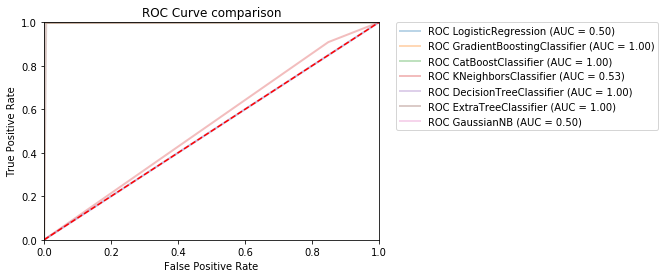

In [25]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

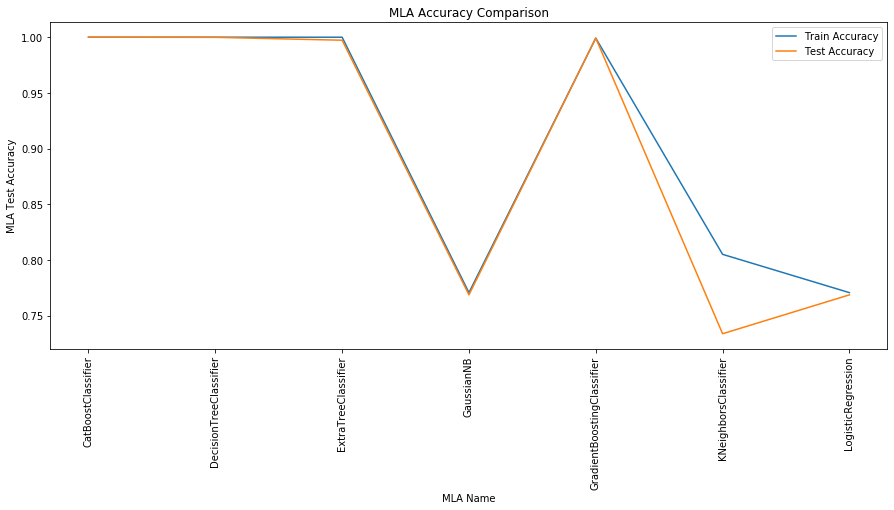

In [26]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()